<a href="https://colab.research.google.com/github/cincysam6/Field_Control_Model/blob/main/field_control_data_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Magic
# %matplotlib inline

# Utility Libraries
from datetime import datetime
import pytz

# HTML
from IPython.display import HTML

# Computation Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import multivariate_normal, gamma
from scipy.spatial.distance import pdist, squareform

# Plotting libraries
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from matplotlib.patches import Rectangle, Arrow

# Graph Libraries
import networkx as nx

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BDB_Data/pres_example_play.csv')
df.head()

,Unnamed: 0,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,team,...,is_off,position,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId,y_norm,x_norm,std_x,std_y,player_tags
0,1,2022092504,2617,38632.0,Kirk Cousins,1,BEFORE_SNAP,2022-09-25 19:03:06.2,8.0,MIN,...,1.0,QB,NaN,NaN,NaN,29.503333,74,-5.87,1.84,off
1,2,2022092504,2617,38632.0,Kirk Cousins,2,BEFORE_SNAP,2022-09-25 19:03:06.3,8.0,MIN,...,1.0,QB,NaN,NaN,NaN,29.503333,74,-5.86,1.83,off
2,3,2022092504,2617,38632.0,Kirk Cousins,3,BEFORE_SNAP,2022-09-25 19:03:06.4,8.0,MIN,...,1.0,QB,NaN,NaN,NaN,29.503333,74,-5.86,1.83,off
3,4,2022092504,2617,38632.0,Kirk Cousins,4,BEFORE_SNAP,2022-09-25 19:03:06.5,8.0,MIN,...,1.0,QB,NaN,NaN,NaN,29.503333,74,-5.85,1.82,off
4,5,2022092504,2617,38632.0,Kirk Cousins,5,BEFORE_SNAP,2022-09-25 19:03:06.6,8.0,MIN,...,1.0,QB,NaN,NaN,NaN,29.503333,74,-5.83,1.81,off


In [ ]:
df[df['event']=='pass_forward']


,Unnamed: 0,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event,absoluteYardlineNumber,receiverAlignment,offenseFormation,down,yardsToGo,is_motion_play,motionSinceLineset_play,inMotionAtBallSnap_play,shiftSinceLineset_play,second,los,x_to_los,x_to_down,inMotionAtBallSnap,shiftSinceLineset,motionSinceLineset,wasRunningRoute,routeRan,is_off,position,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId,y_norm,x_norm,std_x,std_y,player_tags,dist_from_football
3611,158,2022092504,2617,38632.0,Kirk Cousins,158,AFTER_SNAP,2022-09-25 19:03:21.9,8.0,MIN,left,66.810000,26.773333,1.43,0.58,0.15,111.56,85.94,pass_forward,46,3x1,SINGLEBACK,1,10,1,1,1,0,15.8,74,7.190000,17.190000,False,False,False,NaN,NaN,1.0,QB,NaN,NaN,NaN,29.503333,74,-7.190000,-2.730000,off,0.478854
3612,338,2022092504,2617,40488.0,Adam Thielen,158,AFTER_SNAP,2022-09-25 19:03:21.9,19.0,MIN,left,95.050000,8.323333,7.84,2.46,0.79,22.39,96.66,pass_forward,46,3x1,SINGLEBACK,1,10,1,1,1,0,15.8,74,-21.050000,-11.050000,True,False,True,1.0,GO,1.0,WR,NaN,NaN,NaN,29.503333,74,21.050000,-21.180000,motion,33.961213
3613,518,2022092504,2617,44834.0,Charles Harris,158,AFTER_SNAP,2022-09-25 19:03:21.9,53.0,DET,left,74.550000,30.183333,2.60,2.11,0.25,263.13,217.75,pass_forward,46,3x1,SINGLEBACK,1,10,1,1,1,0,15.8,74,-0.550000,9.450000,NaN,NaN,NaN,NaN,NaN,0.0,DE,NaN,NaN,NaN,29.503333,74,0.550000,0.680000,def,8.935055
3614,698,2022092504,2617,44888.0,Alex Anzalone,158,AFTER_SNAP,2022-09-25 19:03:21.9,34.0,DET,left,79.140000,28.303333,7.85,1.57,0.78,150.77,144.02,pass_forward,46,3x1,SINGLEBACK,1,10,1,1,1,0,15.8,74,-5.140000,4.860000,NaN,NaN,NaN,NaN,NaN,0.0,ILB,MAN,47833.0,NaN,29.503333,74,5.140000,-1.200000,def,12.870902
3615,878,2022092504,2617,45094.0,Johnny Mundt,158,AFTER_SNAP,2022-09-25 19:03:21.9,86.0,MIN,left,67.800000,33.183333,3.73,0.51,0.37,290.84,243.69,pass_forward,46,3x1,SINGLEBACK,1,10,1,1,1,0,15.8,74,6.200000,16.200000,False,False,False,NaN,NaN,1.0,TE,NaN,NaN,NaN,29.503333,74,-6.200000,3.680000,off,6.788057
3616,1058,2022092504,2617,46131.0,Brian O'Neill,158,AFTER_SNAP,2022-09-25 19:03:21.9,75.0,MIN,left,64.950000,26.083333,3.70,2.96,0.39,344.89,346.95,pass_forward,46,3x1,SINGLEBACK,1,10,1,1,1,0,15.8,74,9.050000,19.050000,False,False,False,NaN,NaN,1.0,T,NaN,NaN,NaN,29.503333,74,-9.050000,-3.420000,off,1.511687
3617,1238,2022092504,2617,46259.0,DeShon Elliott,158,AFTER_SNAP,2022-09-25 19:03:21.9,5.0,DET,left,90.400000,33.113333,4.36,1.98,0.43,106.94,70.56,pass_forward,46,3x1,SINGLEBACK,1,10,1,1,1,0,15.8,74,-16.400000,-6.400000,NaN,NaN,NaN,NaN,NaN,0.0,FS,2R,52430.0,NaN,29.503333,74,16.400000,3.610000,def,24.892670
3618,1418,2022092504,2617,47801.0,Garrett Bradbury,158,AFTER_SNAP,2022-09-25 19:03:21.9,56.0,MIN,left,70.640000,25.753333,2.36,0.61,0.26,172.79,230.99,pass_forward,46,3x1,SINGLEBACK,1,10,1,1,1,0,15.8,74,3.360000,13.360000,False,False,False,NaN,NaN,1.0,C,NaN,NaN,NaN,29.503333,74,-3.360000,-3.750000,off,4.322800
3619,1598,2022092504,2617,47833.0,Irv Smith,158,AFTER_SNAP,2022-09-25 19:03:21.9,84.0,MIN,left,80.770000,27.503333,7.42,1.59,0.74,207.35,146.63,pass_forward,46,3x1,SINGLEBACK,1,10,1,1,1,0,15.8,74,-6.770000,3.230000,False,False,False,1.0,CROSS,1.0,TE,NaN,NaN,NaN,29.503333,74,6.770000,-2.000000,off,14.412010
3620,1778,2022092504,2617,47885.0,Alexander Mattison,158,AFTER_SNAP,2022-09-25 19:03:21.9,2.0,MIN,left,73.880000,23.123333,5.91,1.74,0.58,177.51,183.55,pass_forward,46,3x1,SINGLEBACK,1,10,1,1,1,0,15.8,74,0.120000,10.120000,False,False,False,NaN,NaN,1.0,RB,NaN,NaN,NaN,29.503333,74,-0.120000,-6.380000,off,8.233863


In [ ]:
#df = pd.read_parquet('/content/drive/MyDrive/BDB_Data/motion_df_for_pitch_control.parquet')


# Filter the DataFrame
filtered_df = df[(df['gameId'] == 2022092504) & (df['playId'] == 2617)]

# Display the filtered DataFrame
print(filtered_df.head())


   Unnamed: 0      gameId  playId    nflId   displayName  frameId  \
0           1  2022092504    2617  38632.0  Kirk Cousins        1   
1           2  2022092504    2617  38632.0  Kirk Cousins        2   
2           3  2022092504    2617  38632.0  Kirk Cousins        3   
3           4  2022092504    2617  38632.0  Kirk Cousins        4   
4           5  2022092504    2617  38632.0  Kirk Cousins        5   

     frameType                   time  jerseyNumber team  ... is_off  \
0  BEFORE_SNAP  2022-09-25 19:03:06.2           8.0  MIN  ...    1.0   
1  BEFORE_SNAP  2022-09-25 19:03:06.3           8.0  MIN  ...    1.0   
2  BEFORE_SNAP  2022-09-25 19:03:06.4           8.0  MIN  ...    1.0   
3  BEFORE_SNAP  2022-09-25 19:03:06.5           8.0  MIN  ...    1.0   
4  BEFORE_SNAP  2022-09-25 19:03:06.6           8.0  MIN  ...    1.0   

   position  pff_defensiveCoverageAssignment  \
0        QB                              NaN   
1        QB                              NaN   
2       

In [ ]:


# Function to compute distance from the football for a given frame
def compute_distances_by_frame(frame_data):
    # Isolate the football's position within the frame
    football_row = frame_data[frame_data['displayName'] == 'football']
    if football_row.empty:
        # If no football is present in the frame, return NaN for distances
        frame_data['dist_from_football'] = np.nan
    else:
        football_x = football_row['x'].values[0]
        football_y = football_row['y'].values[0]
        # Compute the distance for all players in the frame
        frame_data['dist_from_football'] = np.sqrt((frame_data['x'] - football_x) ** 2 +
                                                   (frame_data['y'] - football_y) ** 2)
    return frame_data

# Apply the function for each frameId group
df = df.groupby('frameId').apply(compute_distances_by_frame)

# Reset the index if needed
df.reset_index(drop=True, inplace=True)

# Verify results
print(df[['frameId', 'displayName', 'dist_from_football']])

      frameId         displayName  dist_from_football
0           1        Kirk Cousins            6.201815
1           1        Adam Thielen            6.730499
2           1      Charles Harris            2.227667
3           1       Alex Anzalone            3.314362
4           1        Johnny Mundt            5.450616
...       ...                 ...                 ...
4135      180  Christian Darrisaw           20.413538
4136      180        Alim McNeill           24.373954
4137      180           Ed Ingram           22.974850
4138      180   Malcolm Rodriguez            8.990200
4139      180            football            0.000000

[4140 rows x 3 columns]


<ipython-input-8-5662a40c60b0>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('frameId').apply(compute_distances_by_frame)


In [ ]:
def gaussian_gamma_triangular(df, frame_id, player_ids=None,plot=True):
    """
    Compute Gaussian-Gamma mixture distribution, plot it, and return:
    - influence_df: DataFrame with influence metrics for players
    - player_data: Dictionary with parameters and functions for further analysis
    - fig: The matplotlib figure object containing the plot
    """

    frame_df = df[df['frameId'] == frame_id]
    if frame_df.empty:
        raise ValueError("Frame not found in the data.")

    if player_ids is not None:
        frame_df = frame_df[frame_df['nflId'].isin(player_ids)]

    if frame_df.empty:
        raise ValueError("No players found for the given player IDs.")

    # Parameters for distribution
    sigma = 5
    alpha = 11
    w_gamma_default = 0.5
    angle_limit_max = 45
    angle_limit_min = 15


    x_vals = np.linspace(0, 120, 200)
    y_vals = np.linspace(0, 53.3, 100)
    X, Y = np.meshgrid(x_vals, y_vals)

    def normalize_angle(angle):
        """Normalize angle to range [0, 360]."""
        return (angle + 360) % 360

    def corrected_orientation(original_orientation):
        """
        Adjust orientation: 0° is North, 90° is East, 180° is South, 270° is West.
        """
        return normalize_angle(90 - original_orientation)

    def dynamic_weights(speed):
      """
      Adjust weights dynamically:
      """
      w_gaussian_min = 0.2  # Balanced value at higher speeds
      w_gaussian_max = 1  # Fully Gaussian at very low speeds
      midpoint =  4    # Speed at which Gaussian weight starts decreasing more rapidly
      steepness = 2      # Controls how fast the transition occurs

      # Logistic function to compute Gaussian weight
      w_gaussian = w_gaussian_min + (w_gaussian_max - w_gaussian_min) / (1 + np.exp(steepness * (speed - midpoint)))

      # Ensure Gaussian weight is exactly 1.0 at speed 0–1
      #if speed <= 1:
      #    w_gaussian = 1.0

      w_gamma = 1 - w_gaussian  # Complementary weight for Gamma
      return w_gaussian, w_gamma

    def generate_sigma(player_speed, influence_rad, radius_influence, MAX_PLAYER_SPEED=12, scale_factor=2):
      """
      Generate a dynamic covariance matrix (sigma) for the Gaussian distribution
      based on player speed, influence direction, and an optional scale factor.
      """
      # Rotation matrix for influence direction
      R = np.array([
          [np.cos(influence_rad), -np.sin(influence_rad)],
          [np.sin(influence_rad),  np.cos(influence_rad)]
      ])

      # Dynamic scaling based on speed
      speed_ratio = (player_speed**2) / (MAX_PLAYER_SPEED**2)
      base_radius = radius_influence(0)  # Influence at distance 0

      # Scale the influence radius to make the spread larger
      sigma_x = (base_radius + base_radius * speed_ratio) * scale_factor  # Major axis
      sigma_y = (base_radius - base_radius * speed_ratio) * scale_factor # Minor axis

      # Ensure minimum bounds for sigma_x and sigma_y
      #sigma_x = max(2.0 * scale_factor, sigma_x)  # Scale minimum sigma_x
      #sigma_y = max(1.0 * scale_factor, sigma_y)  # Scale minimum sigma_y

      # Diagonal scaling matrix
      S = np.array([[sigma_x, 0], [0, sigma_y]])

      # Compute rotated covariance matrix
      sigma_throw = R @ S @ S @ R.T
      return sigma_throw


    def compute_offset(player_pos, orientation_deg, speed, alpha=8, beta_min=1.0, beta_max=1, steepness=1, midpoint=1.0):
        """
        Adjust offset so that the densest part of the distribution aligns with player_pos.
        """
        # Compute beta dynamically based on speed
        beta_current = beta_min + (beta_max - beta_min) / (1 + np.exp(steepness * (speed - midpoint)))
        gamma_mode = (alpha - 1) / beta_current  # Mode of the Gamma distribution

        # Offset backward based on gamma_mode and speed
        offset_distance = gamma_mode
        x_offset = player_pos[0] - offset_distance * np.cos(np.radians(corrected_orientation(orientation_deg)))
        y_offset = player_pos[1] - offset_distance * np.sin(np.radians(corrected_orientation(orientation_deg)))

        return (x_offset, y_offset)


    #def compute_offset(player_pos, orientation_deg, speed, alpha=5, beta_min=1, beta_max=1, steepness=1, midpoint=1):

      # Compute beta dynamically based on speed
     # beta_current = beta_min + (beta_max - beta_min) * (speed / midpoint)

      # Calculate a simpler offset that accounts for the speed scaling already present in the main code
      #base_offset = alpha / beta_current  # Use mean instead of mode for more stable behavior
      #gamma_mode = (alpha - 1) / beta_current  # Mode of the Gamma distribution

        # Offset backward based on gamma_mode and speed
      #offset_distance = gamma_mode * (speed/2)
      # Convert orientation to radians and compute offsets
      #orientation_rad = np.radians(orientation_deg)
      #x_offset = player_pos[0] + offset_distance * np.sin(orientation_rad)
      #y_offset = player_pos[1] + offset_distance * np.cos(orientation_rad)

      #return (x_offset, y_offset)




    def base_distribution(player_pos,player_pos_offset, player_orientation_deg, grid, speed, sigma, alpha,dist_from_football):
        x, y = player_pos
        x_offset, y_offset = player_pos_offset
        theta = np.radians(corrected_orientation(player_orientation_deg))
        X, Y = grid
        distance_from_football = dist_from_football

         # Compute velocity vector
        player_vel = np.array([
        np.cos(theta) * speed,
        np.sin(theta) * speed
        ])

        # Compute angle limit dynamically
        factor = 2.0
        angle_limit_current = angle_limit_min + (angle_limit_max - angle_limit_min) * np.exp(-speed / factor)

        def generate_sigma(influence_rad, player_speed, distance_from_football, scale_factor=0.5):
          """
          Generate a smaller covariance matrix by applying a scale factor to the spread.
          """
          # Rotation matrix for influence direction
          R = np.array([[np.cos(influence_rad), -np.sin(influence_rad)],
                        [np.sin(influence_rad),  np.cos(influence_rad)]])

          # Speed-dependent scaling
          speed_ratio = (player_speed**2) / (11.3**2)  # Assuming max speed of 11.3
          base_radius = radius_influence(distance_from_football)

          # Scale the axes
          major_axis = (base_radius + base_radius * speed_ratio) * scale_factor  # Major axis (sigma_x)
          minor_axis = max((base_radius - base_radius * speed_ratio) * scale_factor, major_axis * .5)  # Minor axis (sigma_y)

          # Diagonal scaling matrix
          S = np.array([[major_axis, 0], [0, minor_axis]])

          # Compute rotated covariance matrix
          return R @ (S**2) @ R.T


        def generate_mu(player_position, player_vel):
            return player_position + 0.5 * player_vel

        def radius_influence(x):
            if x <= 18:
                return 1 + (3 / (18 ** 2)) * (x ** 2)
            else:
                return 3


        w_gaussian, w_gamma = dynamic_weights(speed)




        # Influence angle based on player direction
        influence_rad = theta  # Assuming `theta` is the player's orientation in radians


        sigma = generate_sigma(influence_rad, speed, distance_from_football,scale_factor=0.7)
        mu = generate_mu(player_pos, player_vel)

        # Compute Gaussian component
        gaussian_component = multivariate_normal(mean=mu, cov=sigma).pdf(np.dstack((X, Y)))


       # Compute beta dynamically using a logistic function
        beta_min, beta_max = 1.0, 20.0
        midpoint = 15.0
        steepness = 1
        beta_current = beta_min + (beta_max - beta_min) * (speed / midpoint)
        beta_current = np.clip(beta_current, beta_min, beta_max)  # Ensure we stay within bounds

        # Adjust `max_forward_distance` dynamically based on speed
        max_forward_distance = 20

        # Gamma component
        dx = X - x_offset
        dy = Y - y_offset
        d_proj = dx * np.cos(theta) + dy * np.sin(theta)

        # Adjust scaling to extend the distribution reach
        d_proj_scaled = d_proj / max(speed*(1+(speed/18)), 1e-3)

        gamma_component = gamma.pdf(d_proj_scaled, a=alpha, scale=1 / (beta_current*.8))
        # Forward decay with dynamic distance
        beyond_mask = (d_proj > max_forward_distance)
        decay_factor = speed
        gamma_component[beyond_mask] *= np.exp(-((d_proj[beyond_mask] - max_forward_distance) ** 2) / (2 * decay_factor ** 2))

        # Angular Filtering
        angle_to_point = np.arctan2(dy, dx)
        angle_diff = np.abs((angle_to_point - theta + np.pi) % (2 * np.pi) - np.pi)
        gamma_component *= 1 / (1 + np.exp(10 * (angle_diff - np.radians(angle_limit_current))))

        # Normalize gamma component
        max_gamma = gamma_component.max()
        if max_gamma > 0:
            gamma_component /= max_gamma
        else:
            gamma_component = np.zeros_like(gamma_component)







        # Gamma component
     #   dx = X - x_offset
     #   dy = Y - y_offset
     #  d_proj = dx * np.cos(theta) + dy * np.sin(theta)
     #   d_proj_scaled = d_proj / max(speed, 1e-3)

     #   gamma_component = gamma.pdf(d_proj_scaled, a=alpha, scale=1 / beta_current)

        # Forward decay
        #sw = speed_weighting(speed)
     #   beyond_mask = (d_proj > max_forward_distance)
     #   decay_factor = speed*2
     #   gamma_component[beyond_mask] *= np.exp(-((d_proj[beyond_mask] - max_forward_distance) ** 2) / (2 * decay_factor ** 2))

        # Angular Filtering
      #  angle_to_point = np.arctan2(dy, dx)
      #  angle_diff = np.abs((angle_to_point - theta + np.pi) % (2 * np.pi) - np.pi)
      #  gamma_component *= 1 / (1 + np.exp(10 * (angle_diff - np.radians(angle_limit_current))))

      #  max_gamma = gamma_component.max()
      #  if max_gamma > 0:
      #      gamma_component /= max_gamma
      #  else:
      #      gamma_component = np.zeros_like(gamma_component)

       # Normalize Gaussian component
        gaussian_component /= np.max(gaussian_component)

# Normalize Gamma component
        #gamma_component /= np.max(gamma_component)

# Combine normalized components
        #combined_density = (w_gamma * gamma_component)

        combined_density = w_gaussian * gaussian_component + w_gamma * gamma_component
        return combined_density

    player_influence_data = []
    fig = None


    if plot:
      # Create a figure for plotting
      fig = plt.figure(figsize=(10, 7))

      for _, row in frame_df.iterrows():
          player_pos = np.array([row['x'], row['y']])
          player_orientation_deg = row['dir']
          speed = row['s']
          dist_from_football = row['dist_from_football']

          player_pos_offset = compute_offset(player_pos, corrected_orientation(player_orientation_deg), speed)
          density = base_distribution(
              player_pos,
              player_pos_offset,
              player_orientation_deg,
              (X, Y),
              speed,
              sigma,
              alpha,
              dist_from_football
          )
      if plot:
        contour = plt.contourf(X, Y, density, levels=20, cmap='viridis', alpha=0.8)
        plt.scatter(player_pos[0], player_pos[1], color='red', label='Original Player Pos', zorder=5)
        plt.scatter(player_pos_offset[0], player_pos_offset[1], color='orange', label='Offset Position', zorder=5)
        plt.arrow(
            player_pos_offset[0], player_pos_offset[1],
            np.cos(np.radians(corrected_orientation(player_orientation_deg))) * 5,
            np.sin(np.radians(corrected_orientation(player_orientation_deg))) * 5,
            head_width=1, head_length=2, fc='blue', ec='blue', zorder=5
        )

        cell_area = (120 / 200) * (53.3 / 100)
        total_influence_area = np.sum(density > 0.01) * cell_area
        total_influence_density = np.sum(density)

        player_influence_data.append({
            'nflId': row['nflId'],
            'position': row.get('position', 'Unknown'),
            'x': player_pos[0],
            'y': player_pos[1],
            'speed': speed,
            'direction': player_orientation_deg,
            'total_influence_area': total_influence_area,
            'total_influence_density': total_influence_density,
            'dist_from_football': dist_from_football
        })
    if plot:
      plt.title(f'Gaussian-Gamma with Speed-Based Angle Limit & Beta Sigmoid (Frame {frame_id})')
      plt.xlabel('X Coordinate')
      plt.ylabel('Y Coordinate')
      plt.colorbar(contour, label="Impact Density")
      plt.legend()
      plt.grid(alpha=0.5)
      plt.show()

    influence_df = pd.DataFrame(player_influence_data)

    # Extract a representative player's data (e.g., first player)
    first_player = frame_df.iloc[0]
    player_data = {
        'player_pos': (first_player['x'], first_player['y']),
        'player_orientation_deg': first_player['dir'],
        'jerseyNumber': first_player.get('jerseyNumber', None),
        'displayName': first_player.get('displayName', None),
        'sigma': sigma,
        'alpha': alpha,
        'X': X,
        'Y': Y,
        'compute_offset': compute_offset,
        'base_distribution': base_distribution,
        'dist_from_football': first_player['dist_from_football']
    }

    return influence_df, player_data, fig

In [ ]:
def plot_speeds_1_to_10(df, frame_id, player_ids):
    """
    Plot the distribution for speeds 1 to 10 using the updated visuals.
    """
    # Now gaussian_gamma_triangular returns influence_df, player_data, and fig
    influence_df, player_data, fig = gaussian_gamma_triangular(df, frame_id, player_ids)
    # Extract parameters
    player_pos = player_data['player_pos']
    player_orientation_deg = player_data['player_orientation_deg']
    jerseyNumber = player_data['jerseyNumber']
    displayName = player_data['displayName']
    sigma = player_data['sigma']
    alpha = player_data['alpha']
    dist_from_football = player_data['dist_from_football']
    # Note: beta is now dynamic based on speed, so we do not extract it
    X = player_data['X']
    Y = player_data['Y']
    compute_offset = player_data['compute_offset']
    base_distribution = player_data['base_distribution']

    def normalize_angle(angle):
        """Normalize angle to range [0, 360]."""
        return (angle + 360) % 360

    def corrected_orientation(original_orientation):
        """
        Adjust orientation: 0° is North, 90° is East, 180° is South, 270° is West.
        """
        return normalize_angle(90 - original_orientation)

    # Loop through speeds 1 to 10
    for speed in range(1, 11):
        player_pos_offset = compute_offset(player_pos, player_orientation_deg, speed)

        # Call base_distribution without angle_limit and beta since both are computed internally
        combined_density = base_distribution(
            player_pos,
            player_pos_offset,
            player_orientation_deg,
            (X, Y),
            speed,
            sigma,
            alpha,
            dist_from_football
        )

        plt.figure(figsize=(10,7))
        contour = plt.contourf(X, Y, combined_density, levels=20, cmap='Reds', alpha=0.3)
        plt.scatter(player_pos[0], player_pos[1], color='blue', edgecolor='black', s=100, zorder=5)

        # Jersey number above
        if jerseyNumber is not None:
            plt.text(player_pos[0], player_pos[1] + 1, f"{int(jerseyNumber)}",
                     fontsize=10, ha='center', color='black', zorder=6)

        # Display name below
        if displayName is not None:
            plt.text(player_pos[0], player_pos[1] - 2, displayName,
                     fontsize=8, ha='center', color='black', zorder=6)

        theta = np.radians(corrected_orientation(player_orientation_deg))
        arrow_length = speed / 11.3 * 5
        plt.arrow(player_pos[0], player_pos[1],
                  arrow_length * np.cos(theta),
                  arrow_length * np.sin(theta),
                  head_width=1, head_length=2, fc='black', ec='black', zorder=6)

        plt.title(f'Gaussian-Gamma Influence with Dynamic Angle & Beta (Frame {frame_id}, Speed={speed})')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(alpha=0.2)
        plt.xlim(20,80)
        plt.ylim(0,53.3)
        plt.colorbar(contour, label="Impact Density")
        plt.show()

In [ ]:
def plot_for_pres(df, frame_id, player_ids):
    """
    Plot the distribution for speeds 1 to 10 using the updated visuals.
    """
    # Now gaussian_gamma_triangular returns influence_df, player_data, and fig
    influence_df, player_data, fig = gaussian_gamma_triangular(df, frame_id, player_ids)
    # Extract parameters
    player_pos = player_data['player_pos']
    player_orientation_deg = player_data['player_orientation_deg']
    jerseyNumber = player_data['jerseyNumber']
    displayName = player_data['displayName']
    sigma = player_data['sigma']
    alpha = player_data['alpha']
    dist_from_football = player_data['dist_from_football']
    # Note: beta is now dynamic based on speed, so we do not extract it
    X = player_data['X']
    Y = player_data['Y']
    compute_offset = player_data['compute_offset']
    base_distribution = player_data['base_distribution']

    def normalize_angle(angle):
        """Normalize angle to range [0, 360]."""
        return (angle + 360) % 360

    def corrected_orientation(original_orientation):
        """
        Adjust orientation: 0° is North, 90° is East, 180° is South, 270° is West.
        """
        return normalize_angle(90 - original_orientation)

    # Loop through speeds 1 to 10
    for speed in [1,5,10]:
        player_pos_offset = compute_offset(player_pos, player_orientation_deg, speed)

        # Call base_distribution without angle_limit and beta since both are computed internally
        combined_density = base_distribution(
            player_pos,
            player_pos_offset,
            player_orientation_deg,
            (X, Y),
            speed,
            sigma,
            alpha,
            dist_from_football
        )

        plt.figure(figsize=(10,7))
        contour = plt.contourf(X, Y, combined_density, levels=20, cmap='Reds', alpha=0.3)
        plt.scatter(player_pos[0], player_pos[1], color='blue', edgecolor='black', s=100, zorder=5)

        # Jersey number above
        #if jerseyNumber is not None:
        #    plt.text(player_pos[0], player_pos[1] + 1, f"{int(jerseyNumber)}",
        #             fontsize=10, ha='center', color='black', zorder=6)

        # Display name below
        #if displayName is not None:
        #    plt.text(player_pos[0], player_pos[1] - 2, displayName,
        #             fontsize=8, ha='center', color='black', zorder=6)

        theta = np.radians(corrected_orientation(player_orientation_deg))
        arrow_length = speed / 11.3 * 5
        plt.arrow(player_pos[0], player_pos[1],
                  arrow_length * np.cos(theta),
                  arrow_length * np.sin(theta),
                  head_width=1, head_length=2, fc='black', ec='black', zorder=6)

        plt.title(f'Player Field Control (Gaussian-Gamma Influence) at  Speed={speed}')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(alpha=0.2)
        plt.xlim(30,60)
        plt.ylim(10,30)
        #plt.colorbar(contour, label="Impact Density")
        plt.show()

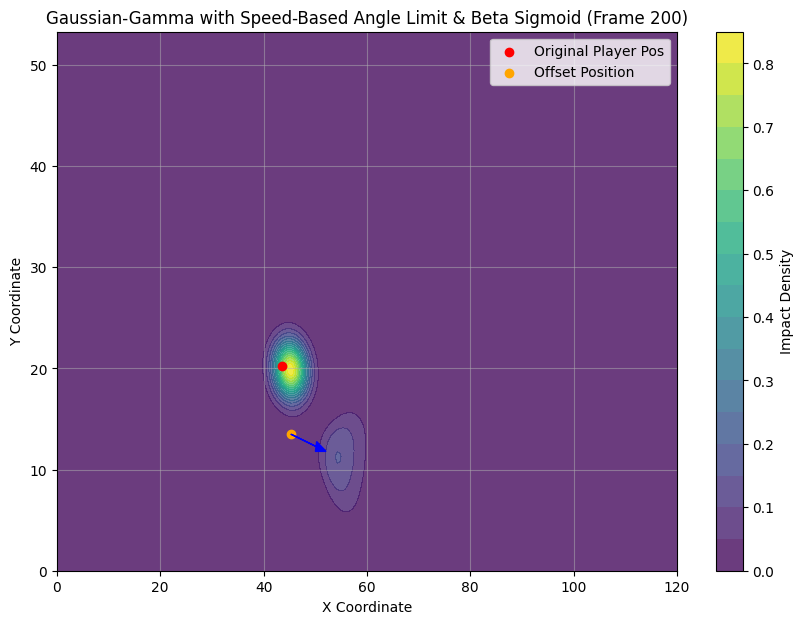

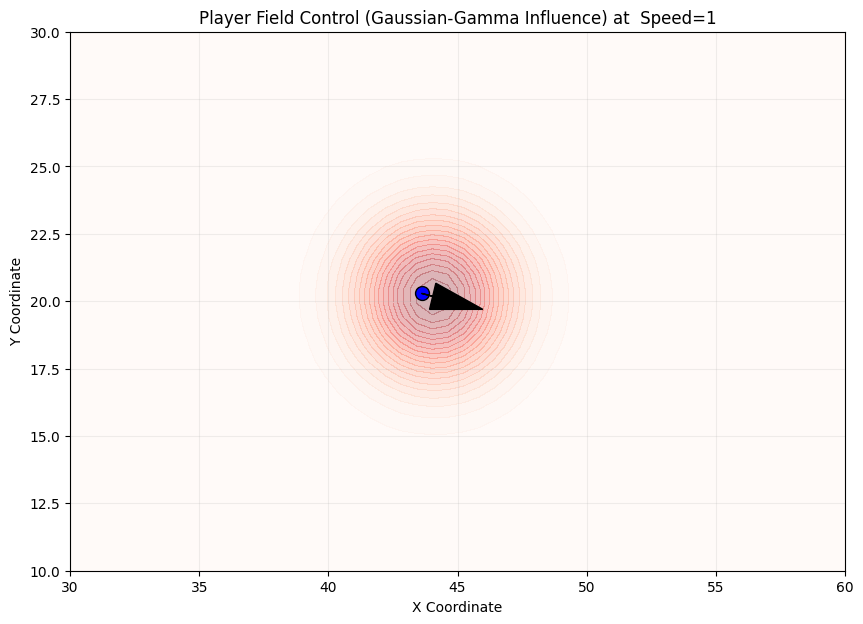

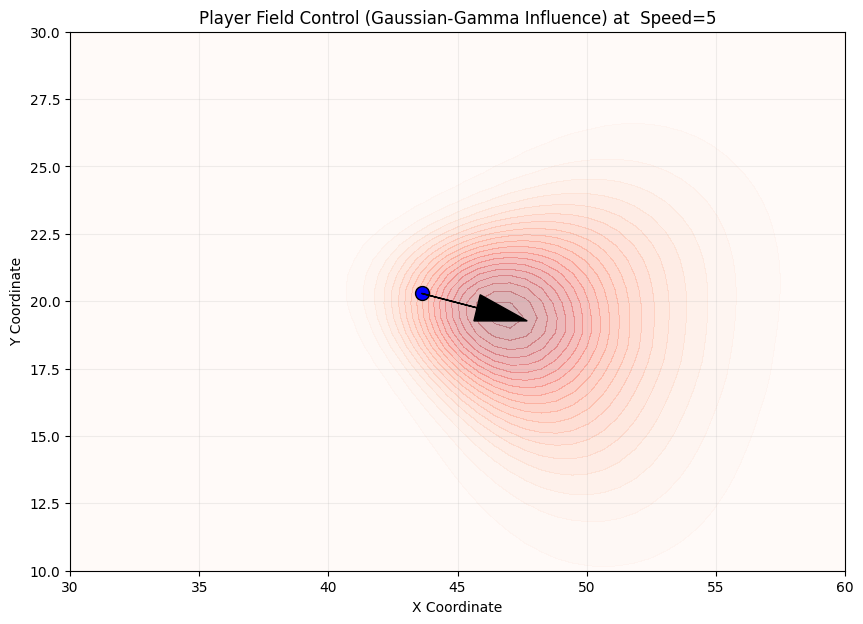

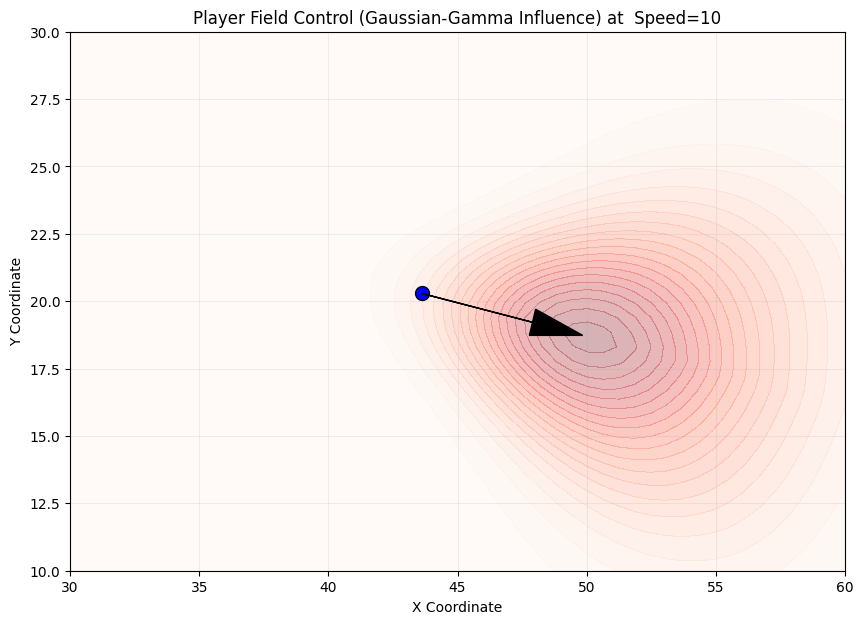

In [ ]:
plot_for_pres(df, 200,one_player)

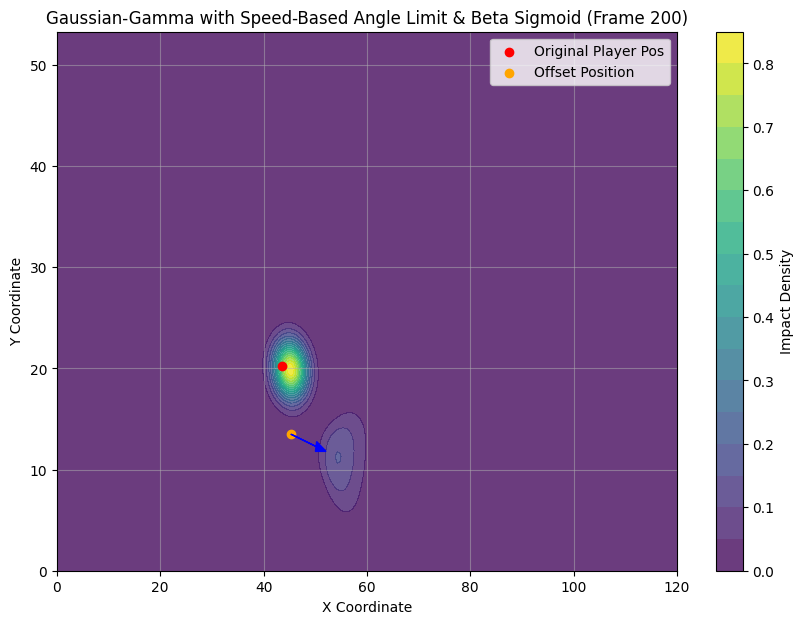

In [ ]:
one_player = [39987.]
influence_df, player_data,fig = gaussian_gamma_triangular(df, 200,one_player,plot=True)

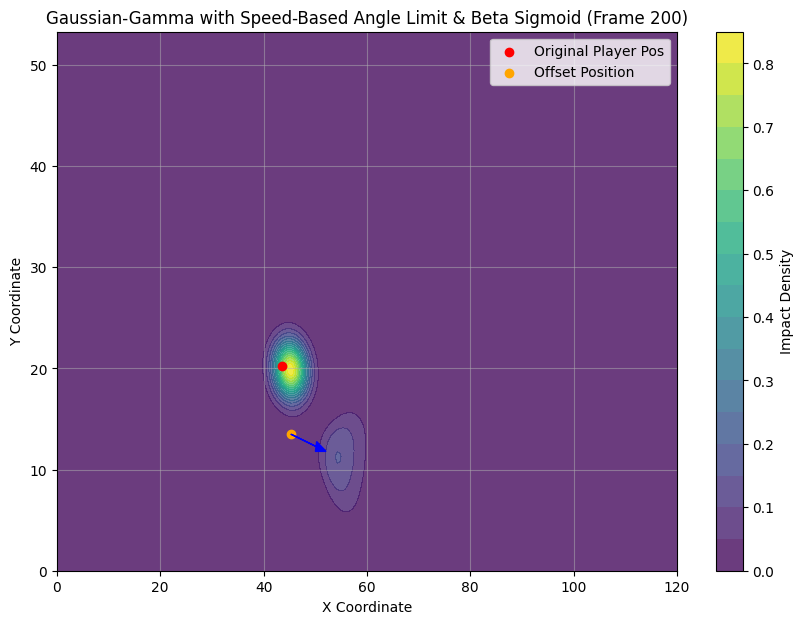

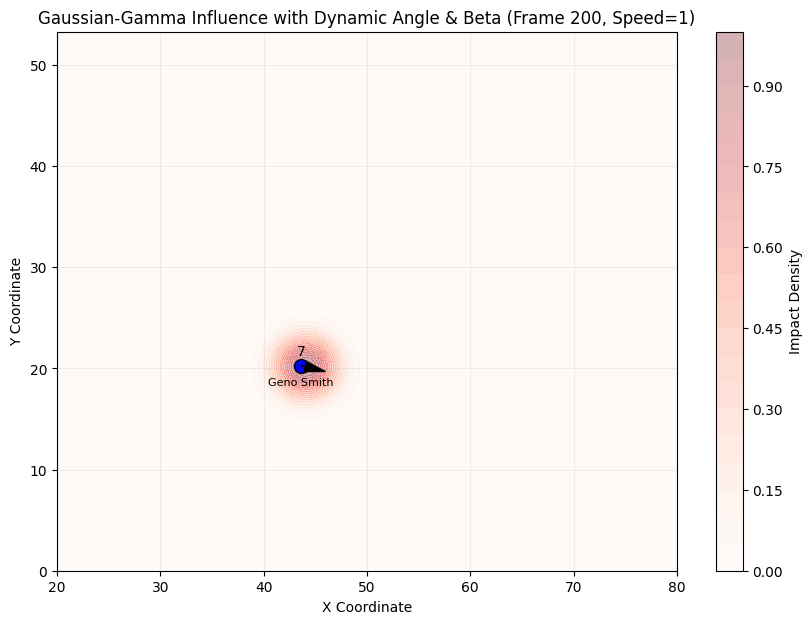

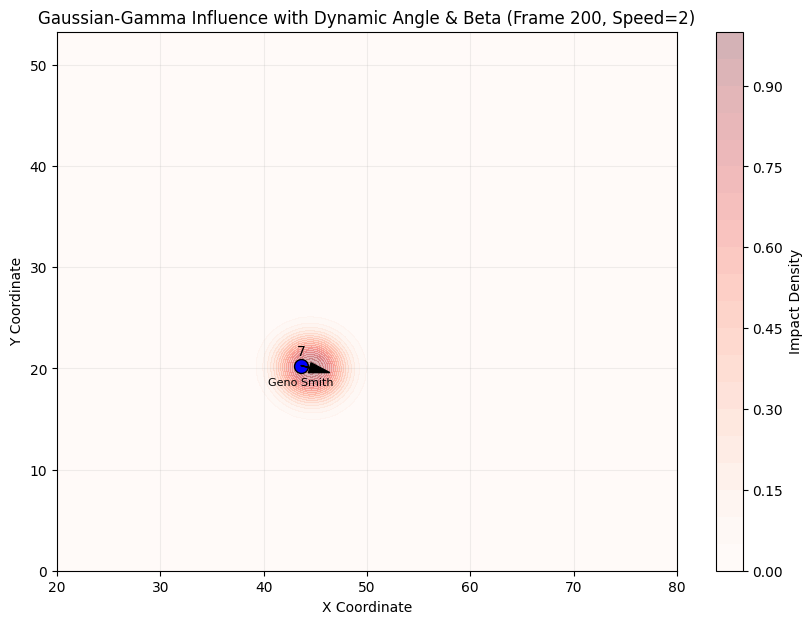

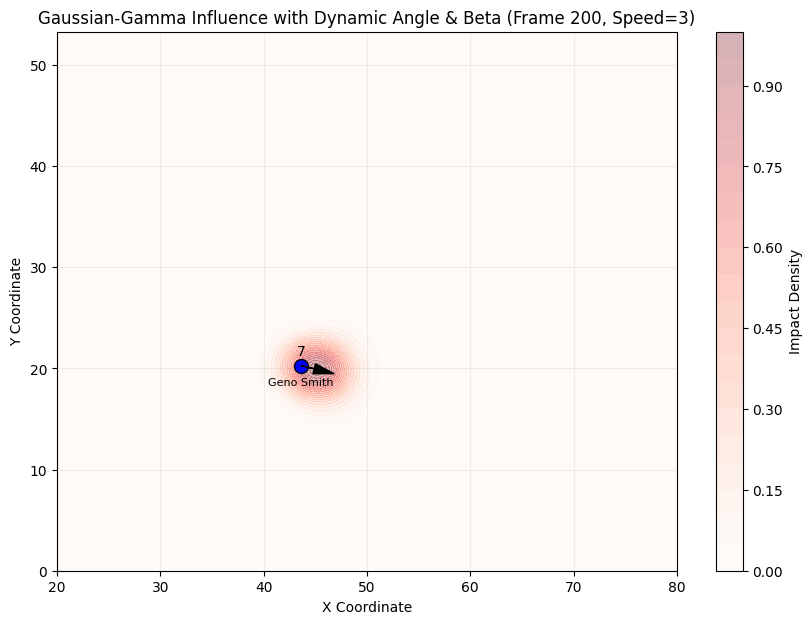

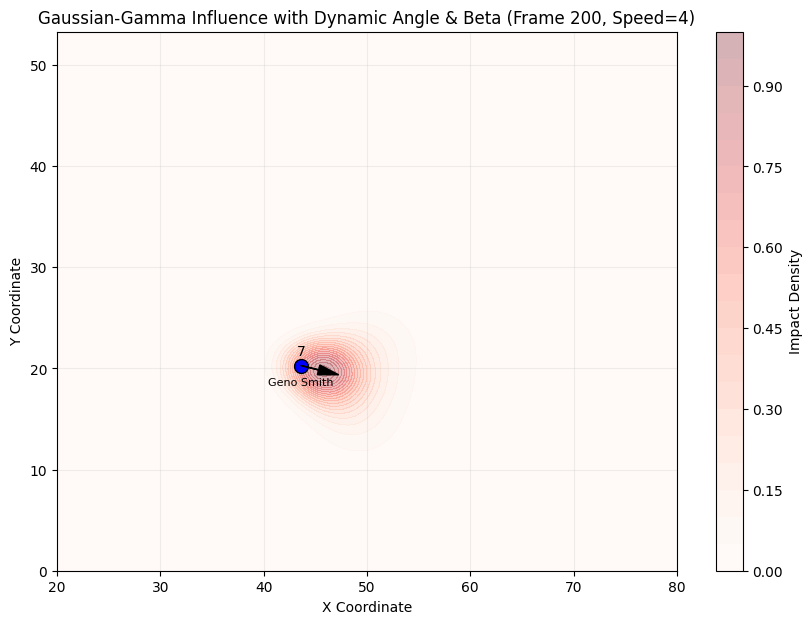

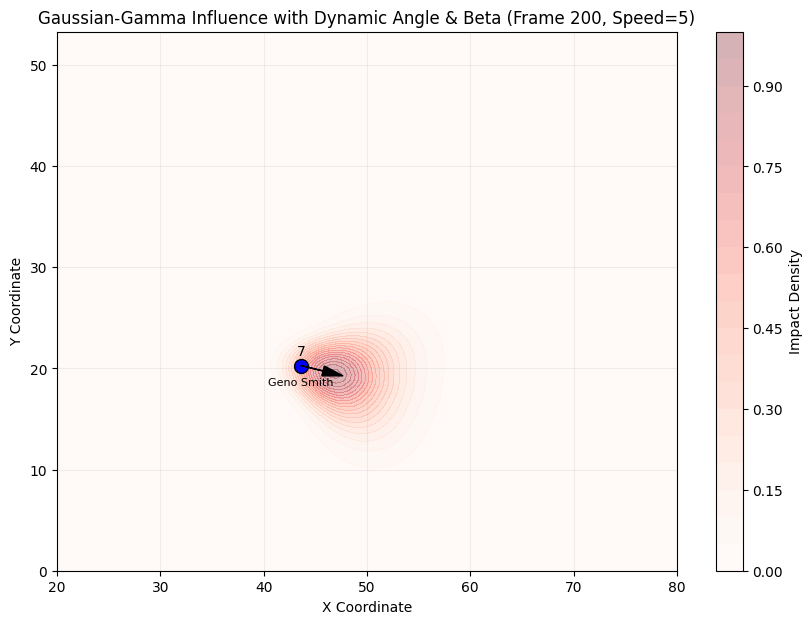

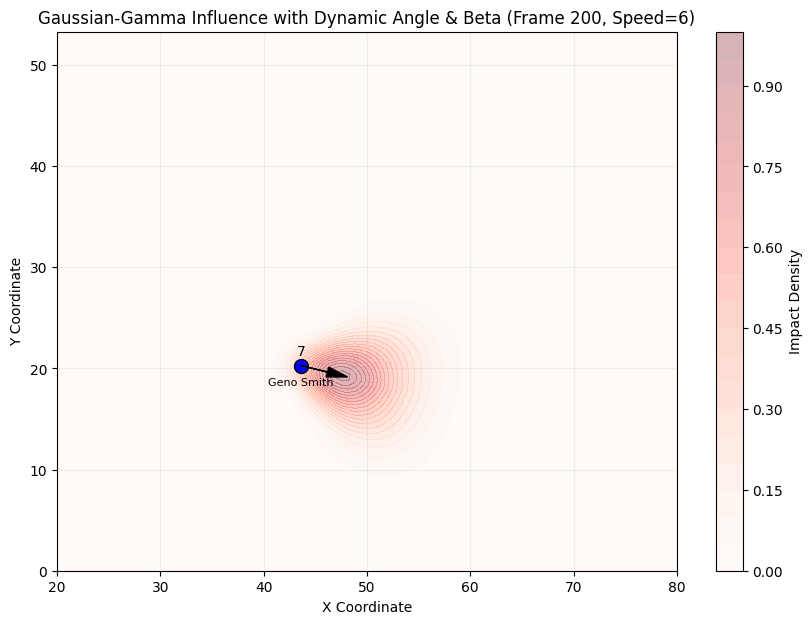

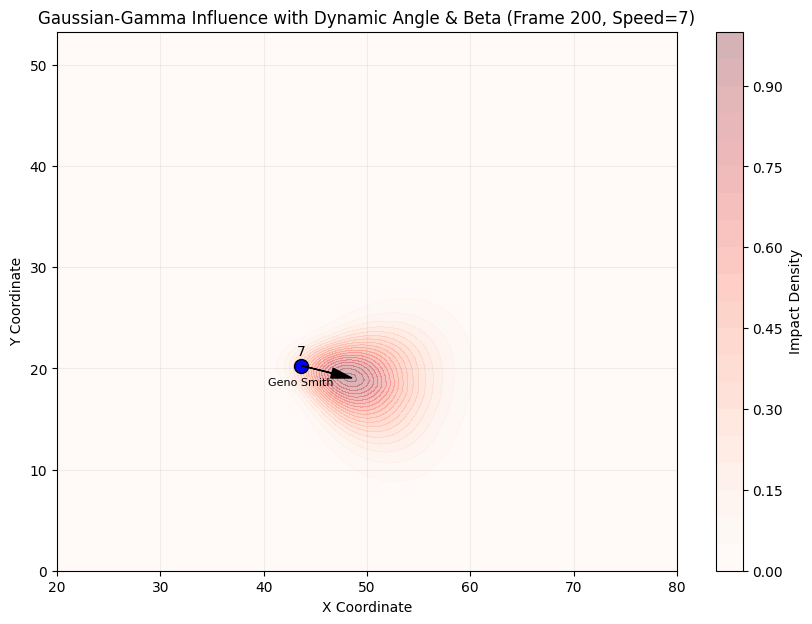

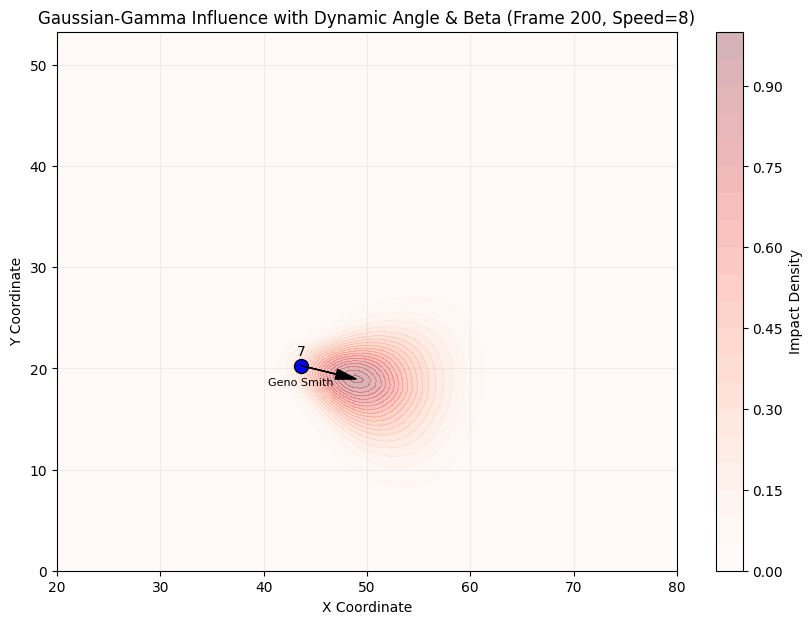

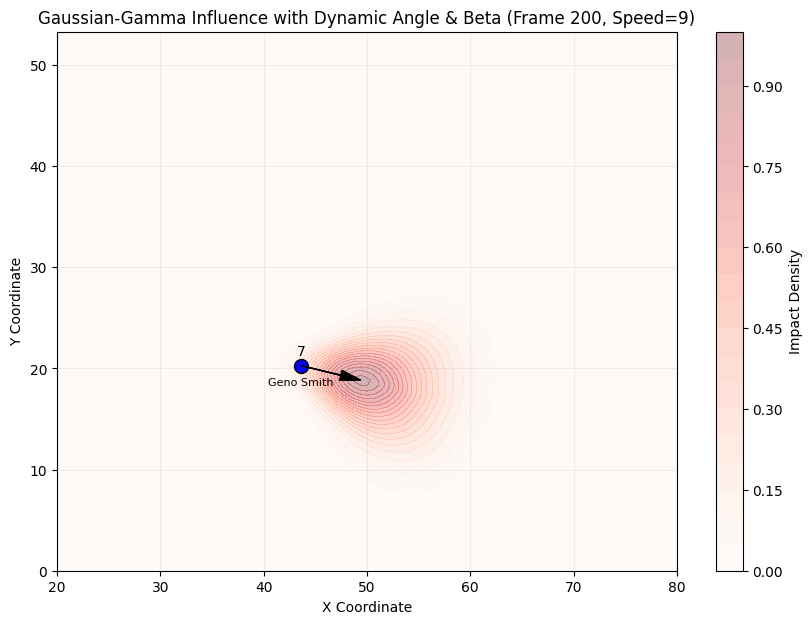

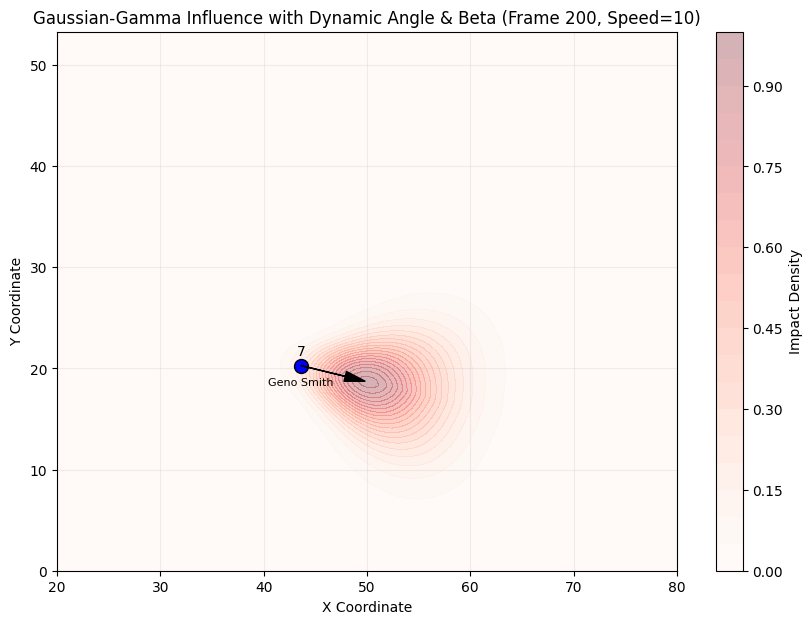

In [ ]:
plot_speeds_1_to_10(df, 200,one_player)

In [ ]:
def compute_player_densities_dataframe(df, min_frame, max_frame):
    """
    Compute Gaussian-Gamma densities for all players across a range of frames without generating plots.
    Returns a DataFrame with player positions, details, and the computed density grids for all frames.
    """
    if min_frame > max_frame:
        raise ValueError("min_frame must be less than or equal to max_frame.")

    # Storage for all player data across frames
    all_player_data_list = []

    # Generate field grid for density computations (consistent for all frames)
    x_vals = np.linspace(0, 120, 200)
    y_vals = np.linspace(0, 53.3, 100)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Loop through each frame in the specified range
    for frame_id in range(min_frame, max_frame + 1):
        frame_df = df[df['frameId'] == frame_id]
        if frame_df.empty:
            print(f"Warning: No data for frame {frame_id}, skipping.")
            continue

        # Loop through each player in the frame and compute densities
        for _, row in frame_df.iterrows():
            if row.displayName == 'football':
                continue  # Skip the football

            # Extract player attributes
            player_id = row.nflId
            player_pos = (row.x, row.y)
            orientation_deg = row.dir
            speed = row.s
            dist_from_football = row.dist_from_football

            try:
                # Use gaussian_gamma_triangular to compute base distribution
                influence_df, player_data, _ = gaussian_gamma_triangular(df, frame_id, player_ids=[player_id], plot=False)

                # Compute offset position
                player_pos_offset = player_data['compute_offset'](player_pos, orientation_deg, speed)

                # Compute base density
                base_density = player_data['base_distribution'](
                    player_pos,player_pos_offset, orientation_deg, (X, Y), speed, player_data['sigma'], player_data['alpha'],dist_from_football
                )

                # Append player data and density grid to the list
                all_player_data_list.append({
                    'nflId': player_id,
                    'frameId': frame_id,
                    'displayName': row.displayName,
                    'jerseyNumber': row.jerseyNumber,
                    'x': player_pos[0],
                    'y': player_pos[1],
                    'speed': speed,
                    'orientation': orientation_deg,
                    'direction': row.dir,
                    'is_off': row.is_off,  # Offensive/Defensive flag
                    'density': base_density,  # Store the density grid
                    'dist_from_football': row.dist_from_football
                })
            except Exception as e:
                print(f"Error processing player {row.displayName} in frame {frame_id}: {e}")

    # Convert list of dictionaries to a DataFrame
    all_player_df = pd.DataFrame(all_player_data_list)
    return all_player_df, (X, Y)


In [ ]:
def plot_player_densities_from_dataframe(player_df, grid, frame_id):
    """
    Plot player influence densities from precomputed density grids in player_df.
    Uses the stored density grids without recomputation.
    """
    # Extract grid coordinates
    X, Y = grid

    # Visualization setup
    plot_size_len = 20
    _MAX_FIELD_Y = 53.3
    _MAX_FIELD_X =120

    fig, ax = plt.subplots(figsize=(plot_size_len, plot_size_len * (_MAX_FIELD_Y / _MAX_FIELD_X)))
    def corrected_orientation(original_orientation):
        """
        Adjust orientation: 0° is North, 90° is East, 180° is South, 270° is West.
        """
        return normalize_angle(90 - original_orientation)

    def normalize_angle(angle):
        """Normalize angle to range [0, 360]."""
        return (angle + 360) % 360


    # Plot field grid lines
    for idx in range(10, 120, 10):
        ax.axvline(idx, color='k', linestyle='-', alpha=0.05)

    # Iterate through player_df to plot densities and player positions
    for _, row in player_df.iterrows():
        if row['displayName'] == 'football':
            continue  # Skip the football

        # Set color based on offensive/defensive player
        player_color = 'blue' if row['is_off'] == 1 else 'red'
        density_color = 'Blues' if row['is_off'] == 1 else 'Reds'

        # Extract density grid for this player and filter out low values
        density = row['density']
        Z_coarse = np.where(density > 0.01, density, np.nan)  # Filter density grid

        # Plot the influence contours using filtered density (Z_coarse)
        ax.contourf(X, Y, Z_coarse, cmap=density_color, levels=20, alpha=0.3)

        # Plot player position as a scatter point
        ax.scatter(row['x'], row['y'], color=player_color, s=200, edgecolor='black', zorder=5)
        ax.text(row['x'], row['y'], f"{int(row['jerseyNumber'])}", fontsize=8, ha='center', color='white', zorder=6)
        ax.text(row['x'], row['y'] - 1.5, row['displayName'], fontsize=8, ha='center', color='black', zorder=6)

        # Plot orientation arrow
        ax.arrow(
            row['x'], row['y'],
            2 * np.cos(np.radians(corrected_orientation(row['orientation']))),
            2 * np.sin(np.radians(corrected_orientation(row['orientation']))),
            head_width=0.375, head_length=.75, fc='black', ec='black', zorder=4
        )

    # Finalize plot
    plt.xlim(60,100)
    plt.ylim(10,40)
    ax.set_title(f"Individual Player Influence At Snap")
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.set_xlim(0, _MAX_FIELD_X)
    ax.set_ylim(0, _MAX_FIELD_Y)
    ax.grid(alpha=0.1)
    plt.show()

<ipython-input-9-25a4b7ef71f1>:216: RuntimeWarning: divide by zero encountered in divide
  gamma_component[beyond_mask] *= np.exp(-((d_proj[beyond_mask] - max_forward_distance) ** 2) / (2 * decay_factor ** 2))
<ipython-input-9-25a4b7ef71f1>:216: RuntimeWarning: divide by zero encountered in divide
  gamma_component[beyond_mask] *= np.exp(-((d_proj[beyond_mask] - max_forward_distance) ** 2) / (2 * decay_factor ** 2))
<ipython-input-9-25a4b7ef71f1>:216: RuntimeWarning: divide by zero encountered in divide
  gamma_component[beyond_mask] *= np.exp(-((d_proj[beyond_mask] - max_forward_distance) ** 2) / (2 * decay_factor ** 2))
<ipython-input-9-25a4b7ef71f1>:216: RuntimeWarning: divide by zero encountered in divide
  gamma_component[beyond_mask] *= np.exp(-((d_proj[beyond_mask] - max_forward_distance) ** 2) / (2 * decay_factor ** 2))
<ipython-input-9-25a4b7ef71f1>:216: RuntimeWarning: divide by zero encountered in divide
  gamma_component[beyond_mask] *= np.exp(-((d_proj[beyond_mask] - max_f

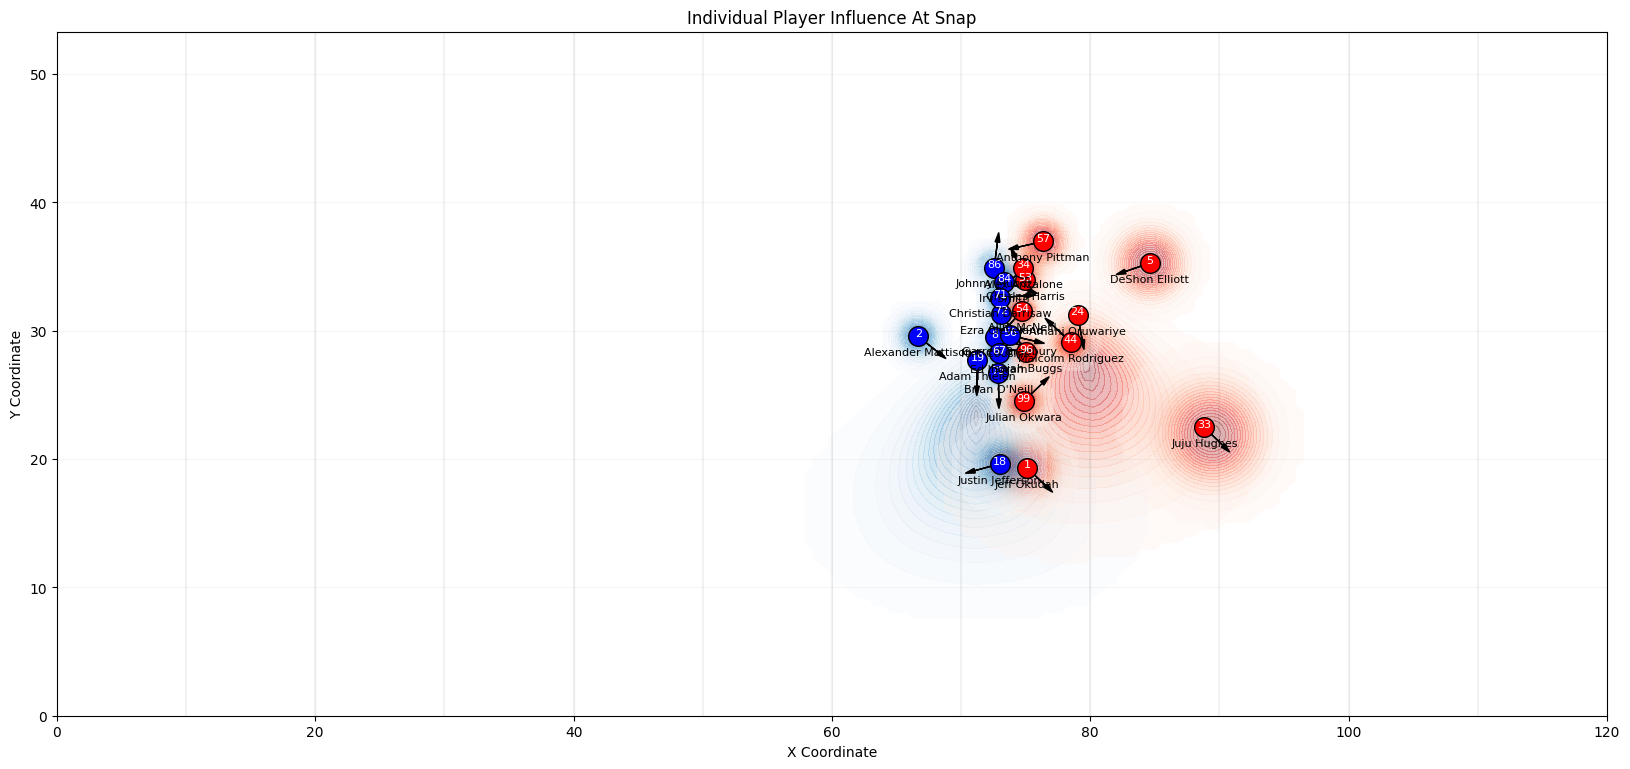

In [ ]:
# Step 2: Plot the densities using the stored density grids
frame_id=117
player_df, grid = compute_player_densities_dataframe(df,min_frame=117, max_frame=117)
plot_player_densities_from_dataframe(player_df, grid, frame_id)


In [ ]:
print(player_df)

      nflId  frameId       displayName  jerseyNumber      x      y  speed  \
0   35459.0      169    Kareem Jackson          22.0  54.71  39.51   2.81   
1   39987.0      169        Geno Smith           7.0  38.76  24.59   0.87   
2   40026.0      169  Marquise Goodwin          11.0  56.12   7.94   6.27   
3   41310.0      169      Gabe Jackson          66.0  41.56  23.00   2.55   
4   42030.0      169   K'Waun Williams          21.0  53.32  10.50   3.75   
5   42393.0      169      Ronald Darby          23.0  57.35  44.43   5.56   
6   42403.0      169     Randy Gregory           5.0  39.28  26.88   3.37   
7   42412.0      169     Tyler Lockett          16.0  51.64  37.69   4.41   
8   42929.0      169    Alex Singleton          49.0  52.39  21.14   2.04   
9   43387.0      169    Justin Simmons          31.0  66.04  23.91   4.00   
10  43537.0      169     Austin Blythe          63.0  42.93  24.62   1.26   
11  45011.0      169        D.J. Jones          97.0  42.59  23.16   2.77   

In [ ]:
player_df.dtypes

,0
nflId,float64
frameId,int64
displayName,object
jerseyNumber,float64
x,float64
y,float64
speed,float64
orientation,float64
direction,float64
is_off,float64


In [ ]:
import numpy as np
import pandas as pd
import ast

# Assuming your DataFrame is named `df`
field_x_range = (0, 120)
field_y_range = (0, 53.3)

def calculate_ownership(df):
    if 'density' not in df.columns:
        raise ValueError("The 'density' column is missing in the DataFrame.")

    ownership_results = []

    for idx, row in df.iterrows():
        try:
            # If density is already a numpy array, use it directly
            density_matrix = row['density'] if isinstance(row['density'], np.ndarray) else np.array(row['density'])
            total_density = np.sum(density_matrix)  # Sum player's density
            ownership_results.append(total_density)
        except Exception as e:
            print(f"Error processing row {idx}: {e}")
            ownership_results.append(0)  # Assign zero if density is invalid

    df['total_density'] = ownership_results
    total_field_density = df['total_density'].sum()
    if total_field_density == 0:
        raise ValueError("Total field density is zero; check the density values.")
    df['percent_ownership'] = (df['total_density'] / total_field_density) * 100

    return df




In [ ]:
# Apply the function
df_with_ownership = calculate_ownership(player_df)

# Display results
print(df_with_ownership[['nflId', 'displayName', 'percent_ownership']])

print(df_with_ownership.sum())


      nflId       displayName  percent_ownership
0   35459.0    Kareem Jackson           4.224387
1   39987.0        Geno Smith           0.489888
2   40026.0  Marquise Goodwin           8.955443
3   41310.0      Gabe Jackson           0.830694
4   42030.0   K'Waun Williams           5.370712
5   42393.0      Ronald Darby           8.498691
6   42403.0     Randy Gregory           2.011505
7   42412.0     Tyler Lockett           7.073466
8   42929.0    Alex Singleton           3.318711
9   43387.0    Justin Simmons           6.076339
10  43537.0     Austin Blythe           0.623342
11  45011.0        D.J. Jones           1.086103
12  46074.0     Bradley Chubb           4.657217
13  47803.0         Noah Fant          10.364878
14  47847.0        DK Metcalf           7.261758
15  47854.0    Dre'Mont Jones           0.708423
16  47907.0       Phil Haynes           0.726497
17  47987.0      Travis Homer           9.251963
18  52706.0    Jonas Griffith           8.786848
19  53438.0   Patric

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Arrow
import matplotlib.animation as animation
import seaborn as sns

class AnimatePlayWithDensity:
    def __init__(self, play_df, precomputed_df, grid, plot_size_len, show_contours=True) -> None:
        """
        Initializes the datasets used to animate the play, including player densities.

        Parameters
        ----------
        play_df : DataFrame
            Dataframe containing play, position, and velocity data for players and the football.

        precomputed_df : DataFrame
            DataFrame containing precomputed densities for each player and frame.

        grid : tuple
            Tuple of mesh grid (X, Y) used for plotting density contours.

        plot_size_len : int or float
            Size of the plot for visualization.

        show_contours : bool
            Whether to display player density contours.
        """
        self._MAX_FIELD_Y = 53.3
        self._MAX_FIELD_X = 120
        self._MAX_FIELD_PLAYERS = 22

        self._CPLT = sns.color_palette("husl", 2)
        self._frame_data = play_df
        self._precomputed_df = precomputed_df
        self._X, self._Y = grid  # Precomputed grid for density
        self.show_contours = show_contours
        self._frames = sorted(play_df.frameId.unique())
        self._stream = self.data_stream()

        # Initialize plot
        self._fig = plt.figure(figsize=(plot_size_len, plot_size_len * (self._MAX_FIELD_Y / self._MAX_FIELD_X)))
        self._ax_field = plt.gca()

        # Storage for visuals
        self._scat_jersey_list = []
        self._scat_number_list = []
        self._scat_name_list = []
        self._a_dir_list = []
        self._a_or_list = []
        self._contours = []

        # Start the animation
        self.ani = animation.FuncAnimation(
            self._fig, self.update, frames=len(self._frames),
            init_func=self.setup_plot, blit=False
        )
        plt.close()

    @staticmethod
    def set_axis_plots(ax, max_x, max_y) -> None:
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.set_xlim([0, max_x])
        ax.set_ylim([0, max_y])

    @staticmethod
    def convert_orientation(x):
        return (-x + 90) % 360

    @staticmethod
    def polar_to_z(r, theta):
        return r * np.exp(1j * theta)

    @staticmethod
    def deg_to_rad(deg):
        return deg * np.pi / 180

    def data_stream(self):
        for frame in self._frames:
            yield self._frame_data[self._frame_data.frameId == frame]

    def setup_plot(self):
        # Field setup
        self.set_axis_plots(self._ax_field, self._MAX_FIELD_X, self._MAX_FIELD_Y)
        for idx in range(10, 120, 10):
            self._ax_field.axvline(idx, color='k', linestyle='-', alpha=0.05)

        # Initialize scatter plots
        self._scat_field = self._ax_field.scatter([], [], s=100, color='black', label="Football")
        self._scat_offense = self._ax_field.scatter([], [], s=500, color='blue', edgecolors='k', label="Offense")
        self._scat_defense = self._ax_field.scatter([], [], s=500, color='red', edgecolors='k', label="Defense")

        # Initialize player annotations
        for _ in range(self._MAX_FIELD_PLAYERS):
            self._scat_jersey_list.append(self._ax_field.text(0, 0, '', ha='center', va='center', c='white'))
            self._scat_number_list.append(self._ax_field.text(0, 0, '', ha='center', va='center', c='black'))
            self._scat_name_list.append(self._ax_field.text(0, 0, '', ha='center', va='center', c='black'))
            self._a_dir_list.append(self._ax_field.add_patch(Arrow(0, 0, 0, 0, color='k')))
            self._a_or_list.append(self._ax_field.add_patch(Arrow(0, 0, 0, 0, color='grey', width=2)))

        self._ax_field.set_title("Frame: 0")  # Initial title
        return (self._scat_field, self._scat_offense, self._scat_defense, *self._scat_jersey_list)

    def update(self, frameId):
        # Fetch positional data
        pos_df = next(self._stream)
        frame_id = pos_df.frameId.iloc[0]

        # Update scatter plots
        offense_df = pos_df[pos_df.is_off == 1]
        defense_df = pos_df[pos_df.is_off == 0]
        football_df = pos_df[pos_df.team == 'football']

        self._scat_offense.set_offsets(np.vstack([offense_df.x, offense_df.y]).T)
        self._scat_defense.set_offsets(np.vstack([defense_df.x, defense_df.y]).T)
        self._scat_field.set_offsets(np.vstack([football_df.x, football_df.y]).T)

         # Update frame title
        self._ax_field.set_title(f"Frame: {frameId}")


        # Clear old contours
        for contour in self._contours:
            contour.remove()
        self._contours = []

        # Plot density contours
        if self.show_contours:
            frame_density_df = self._precomputed_df[self._precomputed_df.frameId == frame_id]

            for _, player_row in frame_density_df.iterrows():
                density = player_row['density']
                player_color = 'Blues' if player_row['is_off'] == 1 else 'Reds'
                Z_filtered = np.where(density > 0.001, density, np.nan)

                contour = self._ax_field.contourf(
                    self._X, self._Y, Z_filtered, cmap=player_color, levels=20, alpha=0.3
                )
                self._contours.append(contour)

        # Update player annotations and arrows
        for index, row in pos_df[pos_df.jerseyNumber.notnull()].reset_index().iterrows():
            self._scat_jersey_list[index].set_position((row.x, row.y))
            self._scat_jersey_list[index].set_text(row.position)
            self._scat_number_list[index].set_position((row.x, row.y + 1.5))
            self._scat_number_list[index].set_text(int(row.jerseyNumber))
            self._scat_name_list[index].set_position((row.x, row.y - 1.5))
            self._scat_name_list[index].set_text(row.displayName.split()[-1])

            # Velocity and orientation arrows
            player_orientation_rad = self.deg_to_rad(self.convert_orientation(row.o))
            player_direction_rad = self.deg_to_rad(self.convert_orientation(row.dir))
            player_speed = row.s

            player_vel = np.array([np.real(self.polar_to_z(player_speed, player_direction_rad)),
                                   np.imag(self.polar_to_z(player_speed, player_direction_rad))])
            player_orient = np.array([np.real(self.polar_to_z(2, player_orientation_rad)),
                                      np.imag(self.polar_to_z(2, player_orientation_rad))])

            self._a_dir_list[index].remove()
            self._a_dir_list[index] = self._ax_field.add_patch(Arrow(row.x, row.y, player_vel[0], player_vel[1], color='k'))

            self._a_or_list[index].remove()
            self._a_or_list[index] = self._ax_field.add_patch(Arrow(row.x, row.y, player_orient[0], player_orient[1],
                                                                    color='grey', width=2))

        return (self._scat_field, self._scat_offense, self._scat_defense, *self._scat_jersey_list)


In [ ]:
# Precompute densities
precomputed_densities, grid = compute_player_densities_dataframe(df, 1, 205)

# Initialize the animation
anim = AnimatePlayWithDensity(df, precomputed_densities, grid, plot_size_len=15, show_contours=True)

# Save or display the animation
anim.ani.save("play_with_densities.mp4", fps=10)
plt.show()

<ipython-input-5-25a4b7ef71f1>:216: RuntimeWarning: divide by zero encountered in divide
  gamma_component[beyond_mask] *= np.exp(-((d_proj[beyond_mask] - max_forward_distance) ** 2) / (2 * decay_factor ** 2))
<ipython-input-5-25a4b7ef71f1>:216: RuntimeWarning: divide by zero encountered in divide
  gamma_component[beyond_mask] *= np.exp(-((d_proj[beyond_mask] - max_forward_distance) ** 2) / (2 * decay_factor ** 2))
<ipython-input-5-25a4b7ef71f1>:216: RuntimeWarning: divide by zero encountered in divide
  gamma_component[beyond_mask] *= np.exp(-((d_proj[beyond_mask] - max_forward_distance) ** 2) / (2 * decay_factor ** 2))
<ipython-input-5-25a4b7ef71f1>:216: RuntimeWarning: divide by zero encountered in divide
  gamma_component[beyond_mask] *= np.exp(-((d_proj[beyond_mask] - max_forward_distance) ** 2) / (2 * decay_factor ** 2))
<ipython-input-5-25a4b7ef71f1>:216: RuntimeWarning: divide by zero encountered in divide
  gamma_component[beyond_mask] *= np.exp(-((d_proj[beyond_mask] - max_f

In [ ]:
from scipy.ndimage import gaussian_filter
def compute_player_densities_with_pitch_control(df, min_frame, max_frame):
    """
    Compute Gaussian-Gamma densities for all players across a range of frames and calculate pitch control.
    Uses precomputed densities from the 'density' column in player_df.
    Returns:
    - player_df: DataFrame with player influence data
    - offense_influence_df: Smoothed offensive influence grid
    - defense_influence_df: Smoothed defensive influence grid
    - pitch_control_df: Pitch control grid
    """
    if min_frame > max_frame:
        raise ValueError("min_frame must be less than or equal to max_frame.")

    # Generate field grid for density computations
    x_vals = np.linspace(0, 120, 200)
    y_vals = np.linspace(0, 53.3, 100)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Initialize influence arrays
    inf_offense = np.zeros_like(X)
    inf_defense = np.zeros_like(X)
    valid_players = []

    def sigmoid(x, k=1000):
        """Sigmoid function to normalize pitch control values."""
        return 1 / (1 + np.exp(-k * x))

    for frame_id in range(min_frame, max_frame + 1):
        frame_df = df[df['frameId'] == frame_id]
        if frame_df.empty:
            print(f"Warning: No data for frame {frame_id}, skipping.")
            continue

        #football_position = frame_df[frame_df['displayName'] == 'football'][['x', 'y']].values[0]

        for _, row in frame_df.iterrows():
            if row.displayName == 'football' or pd.isna(row.is_off):
                continue

            # Use precomputed density from the 'density' column
            density = np.array(row['density'])

            # Threshold small densities to avoid artifacts
            density[density < 1e-3] = 0

            # Add influence to offense or defense grids
            if row.is_off:
                inf_offense += density
            else:
                inf_defense += density

            valid_players.append({
                'frameId': frame_id,
                'nflId': row.nflId,
                'displayName': row.displayName,
                'jerseyNumber': row.jerseyNumber,
                'x': row.x,
                'y': row.y,
                'direction': row.direction,
                'speed': row.speed,
                'is_off': row.is_off
            })

    # Smooth the influence grids to reduce artifacts
    inf_offense_smooth = gaussian_filter(inf_offense, sigma=2)
    inf_defense_smooth = gaussian_filter(inf_defense, sigma=2)

    # Compute pitch control
    pitch_control = sigmoid((inf_defense_smooth - inf_offense_smooth), k=1000)

    # Mask neutral areas (0.45 <= pitch_control <= 0.55)
    pitch_control_masked = np.where((pitch_control >= 0.45) & (pitch_control <= 0.55), np.nan, pitch_control)

    # Convert grids to DataFrames
    player_df = pd.DataFrame(valid_players)
    offense_influence_df = pd.DataFrame(inf_offense_smooth, index=y_vals, columns=x_vals)
    defense_influence_df = pd.DataFrame(inf_defense_smooth, index=y_vals, columns=x_vals)
    pitch_control_df = pd.DataFrame(pitch_control_masked, index=y_vals, columns=x_vals)

    return player_df, offense_influence_df, defense_influence_df, pitch_control_df

def visualize_pitch_control_with_players(pitch_control_df, player_df, frame_id):
    """
    Visualize the pitch control grid for a single frame with player positions, jersey numbers,
    player names, and directional arrows based on speed and orientation.
    """
    def corrected_orientation(original_orientation):
        """Correct orientation: 0° is North, 90° is East."""
        return (90 - original_orientation) % 360

    plt.figure(figsize=(12, 6))
    plt.title(f"Team Field Control - At Snap")

    # Plot pitch control
    plt.contourf(pitch_control_df.columns, pitch_control_df.index, pitch_control_df,
                 cmap='coolwarm', levels=20, alpha=0.8)
    plt.colorbar(label="Field Control")

    # Plot player positions and details
    for _, row in player_df[player_df['frameId'] == frame_id].iterrows():
        color = 'blue' if row.is_off else 'red'  # Offensive (red) or defensive (blue)
        player_pos = (row.x, row.y)

        # Plot player position
        plt.scatter(player_pos[0], player_pos[1], color=color, edgecolor='black', s=100, zorder=5)

        # Add player jersey number and name
        if pd.notna(row['jerseyNumber']):
            plt.text(player_pos[0], player_pos[1] + 1, f"{int(row['jerseyNumber'])}",
                     fontsize=10, ha='center', color='black', zorder=6)
        if pd.notna(row['displayName']):
            plt.text(player_pos[0], player_pos[1] - 1.5, row['displayName'],
                     fontsize=8, ha='center', color='black', zorder=6)

        # Add directional arrow based on orientation and speed
        if pd.notna(row['direction']) and pd.notna(row['speed']):
            theta = np.radians(corrected_orientation(row['direction']))
            arrow_length = row['speed'] / 11.3 * 5  # Normalize arrow length
            plt.arrow(player_pos[0], player_pos[1],
                      arrow_length * np.cos(theta),
                      arrow_length * np.sin(theta),
                      head_width=.375, head_length=.75, fc='black', ec='black', zorder=2)
    plt.xlim(60,110)
    plt.ylim(5,45)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(alpha=0.5)
    plt.show()


In [ ]:
def compute_player_densities_with_pitch_control(df, frame_id):
    """
    Compute Gaussian-Gamma densities for a single frame and calculate pitch control.
    Uses precomputed densities from the 'density' column in player_df.
    Returns:
    - player_df: DataFrame with player influence data
    - offense_influence_df: Smoothed offensive influence grid
    - defense_influence_df: Smoothed defensive influence grid
    - pitch_control_df: Pitch control grid
    """
    # Generate field grid for density computations
    x_vals = np.linspace(0, 120, 200)
    y_vals = np.linspace(0, 53.3, 100)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Initialize influence arrays
    inf_offense = np.zeros_like(X)
    inf_defense = np.zeros_like(X)
    valid_players = []

    def sigmoid(x, k=1000):
        """Sigmoid function to normalize pitch control values."""
        return 1 / (1 + np.exp(-k * x))

    # Filter DataFrame for the given frame
    frame_df = df[df['frameId'] == frame_id]
    if frame_df.empty:
        raise ValueError(f"No data found for frame {frame_id}.")

    for _, row in frame_df.iterrows():
        if row.displayName == 'football' or pd.isna(row.is_off):
            continue

        # Use precomputed density from the 'density' column
        density = np.array(row['density'])

        # Threshold small densities to avoid artifacts
        density[density < 1e-3] = 0

        # Add influence to offense or defense grids
        if row.is_off:
            inf_offense += density
        else:
            inf_defense += density

        valid_players.append({
            'frameId': frame_id,
            'nflId': row.nflId,
            'displayName': row.displayName,
            'jerseyNumber': row.jerseyNumber,
            'x': row.x,
            'y': row.y,
            'direction': row.direction,
            'speed': row.speed,
            'is_off': row.is_off,
            'density':density,
            'sum_density': np.sum(density)
        })

    inf_offense /= np.max(inf_offense) if np.max(inf_offense) > 0 else 1
    inf_defense /= np.max(inf_defense) if np.max(inf_defense) > 0 else 1

    # Smooth the influence grids to reduce artifacts
    inf_offense = gaussian_filter(inf_offense, sigma=2)
    inf_defense = gaussian_filter(inf_defense, sigma=2)
     # Normalize influence grids


    # Compute pitch control
    pitch_control = sigmoid((inf_defense - inf_offense), k=25)

    # Mask neutral areas (0.45 <= pitch_control <= 0.55)
    pitch_control_masked = np.where((pitch_control >= 0.45) & (pitch_control <= 0.55), np.nan, pitch_control)

    # Convert grids to DataFrames
    player_df = pd.DataFrame(valid_players)
    offense_influence_df = pd.DataFrame(inf_offense, index=y_vals, columns=x_vals)
    defense_influence_df = pd.DataFrame(inf_defense, index=y_vals, columns=x_vals)
    pitch_control_df = pd.DataFrame(pitch_control_masked, index=y_vals, columns=x_vals)

    return player_df, offense_influence_df, defense_influence_df, pitch_control_df


In [ ]:
# Set Pandas display options to show maximum rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns



In [ ]:
pitch_control_df

,0.000000,0.603015,1.206030,1.809045,2.412060,3.015075,3.618090,4.221106,4.824121,5.427136,6.030151,6.633166,7.236181,7.839196,8.442211,9.045226,9.648241,10.251256,10.854271,11.457286,12.060302,12.663317,13.266332,13.869347,14.472362,15.075377,15.678392,16.281407,16.884422,17.487437,18.090452,18.693467,19.296482,19.899497,20.502513,21.105528,21.708543,22.311558,22.914573,23.517588,24.120603,24.723618,25.326633,25.929648,26.532663,27.135678,27.738693,28.341709,28.944724,29.547739,30.150754,30.753769,31.356784,31.959799,32.562814,33.165829,33.768844,34.371859,34.974874,35.577889,36.180905,36.783920,37.386935,37.989950,38.592965,39.195980,39.798995,40.402010,41.005025,41.608040,42.211055,42.814070,43.417085,44.020101,44.623116,45.226131,45.829146,46.432161,47.035176,47.638191,48.241206,48.844221,49.447236,50.050251,50.653266,51.256281,51.859296,52.462312,53.065327,53.668342,54.271357,54.874372,55.477387,56.080402,56.683417,57.286432,57.889447,58.492462,59.095477,59.698492,60.301508,60.904523,61.507538,62.110553,62.713568,63.316583,63.919598,64.522613,65.125628,65.728643,66.331658,66.934673,67.537688,68.140704,68.743719,69.346734,69.949749,70.552764,71.155779,71.758794,72.361809,72.964824,73.567839,74.170854,74.773869,75.376884,75.979899,76.582915,77.185930,77.788945,78.391960,78.994975,79.597990,80.201005,80.804020,81.407035,82.010050,82.613065,83.216080,83.819095,84.422111,85.025126,85.628141,86.231156,86.834171,87.437186,88.040201,88.643216,89.246231,89.849246,90.452261,91.055276,91.658291,92.261307,92.864322,93.467337,94.070352,94.673367,95.276382,95.879397,96.482412,97.085427,97.688442,98.291457,98.894472,99.497487,100.100503,100.703518,101.306533,101.909548,102.512563,103.115578,103.718593,104.321608,104.924623,105.527638,106.130653,106.733668,107.336683,107.939698,108.542714,109.145729,109.748744,110.351759,110.954774,111.557789,112.160804,112.763819,113.366834,113.969849,114.572864,115.175879,115.778894,116.381910,116.984925,117.587940,118.190955,118.793970,119.396985,120.000000
0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.443979,0.431741,0.417084,0.399795,0.379804,0.357259,0.332589,0.306530,0.280079,0.254366,0.230471,0.209250,0.191230,0.176607,0.165321,0.157157,0.151863,0.149276,0.149391,0.152327,0.158173,0.166831,0.177975,0.191145,0.205871,0.221736,0.238385,0.255553,0.273127,0.291213,0.310152,0.330454,0.352658,0.377127,0.403785,0.431853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.430287,0.370542,0.300800,0.229658,0.166424,0.117059,0.082546,0.060465,0.047490,0.040904,0.039044,0.041224,0.047541,0.058678,0.075662,0.099483,0.130546,0.168153,0.210362,0.254426,0.297552,0.337500,0.372811,0.402782,0.427318,0.446748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.538384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.442417,0.429642,0.414283,0.396099,0.375000,0.351136,0.324974,0.297325,0.269296,0.242139,0.217035,0.194888,0.176208,0.161135,0.149539,0.141154,0.135700,0.133001,0.133050,0.135971,0.141870,0.150681,0.162126,0.175790,0.191228,0.208012,0.225737,0.244062,0.262796,0.282007,0.302044,0.323470,0.346892,0.372711,0.400839,0.430413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.417986,0.352243,0.277574,0.204336,0.142384,0.096587,0.066229,0.047730,0.037365,0.032477,0.031603,0.034258,0.040713,0.051814,0.068758,0.092698,0.124155,0.162442,0.205514,0.250461,0.294354,0.334896,0.370650,0.400963,0.425786,0.445470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

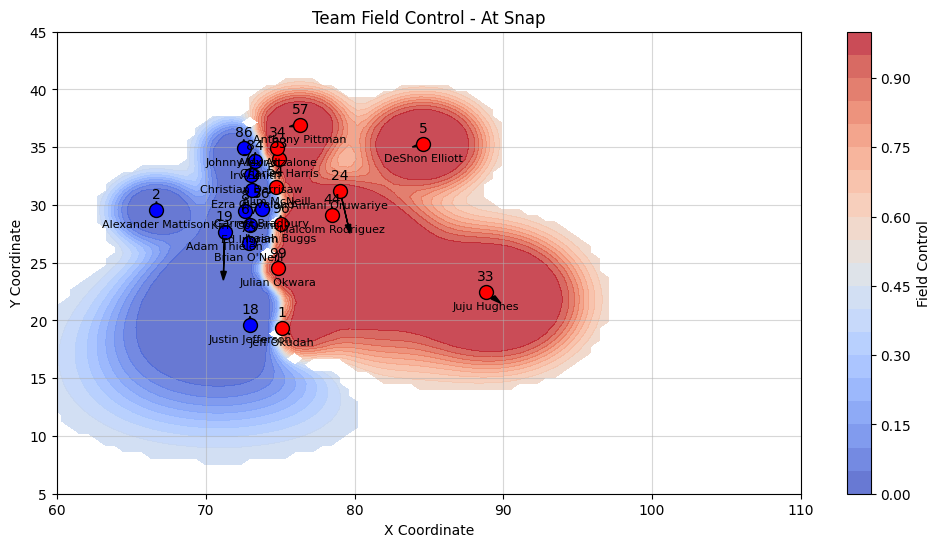

In [ ]:
player_df2, offense_df, defense_df, pitch_control_df = compute_player_densities_with_pitch_control(player_df, frame_id=117)
visualize_pitch_control_with_players(pitch_control_df,player_df2, frame_id=117)

In [ ]:
player_df2

,frameId,nflId,displayName,jerseyNumber,x,y,direction,speed,is_off,density,sum_density
0,169,35459.0,Kareem Jackson,22.0,54.71,39.51,352.66,2.81,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",92.463510
1,169,39987.0,Geno Smith,7.0,38.76,24.59,269.49,0.87,1.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",10.674838
2,169,40026.0,Marquise Goodwin,11.0,56.12,7.94,111.05,6.27,1.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",196.298960
3,169,41310.0,Gabe Jackson,66.0,41.56,23.00,297.10,2.55,1.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",17.942244
4,169,42030.0,K'Waun Williams,21.0,53.32,10.50,203.29,3.75,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",117.684494
5,169,42393.0,Ronald Darby,23.0,57.35,44.43,63.88,5.56,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",186.284541
6,169,42403.0,Randy Gregory,5.0,39.28,26.88,209.43,3.37,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",43.762273
7,169,42412.0,Tyler Lockett,16.0,51.64,37.69,107.34,4.41,1.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",154.889426
8,169,42929.0,Alex Singleton,49.0,52.39,21.14,17.44,2.04,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",72.667502
9,169,43387.0,Justin Simmons,31.0,66.04,23.91,26.94,4.00,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",132.913855


In [ ]:
def compute_player_densities_with_pitch_control_with_field_ownership(df, frame_id):
    """
    Compute Gaussian-Gamma densities for a single frame, calculate pitch control,
    and determine field ownership for each player while considering team ownership.
    """
    # Generate field grid for density computations
    x_vals = np.linspace(0, 120, 200)
    y_vals = np.linspace(0, 53.3, 100)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Initialize influence arrays
    inf_offense = np.zeros_like(X)
    inf_defense = np.zeros_like(X)
    ownership_grid = np.full_like(X, np.nan)  # To track team ownership at each cell

    def sigmoid(x, k=1000):
        """Sigmoid function to normalize pitch control values."""
        return 1 / (1 + np.exp(-k * x))

    # Filter DataFrame for the given frame
    frame_df = df[df['frameId'] == frame_id]
    if frame_df.empty:
        raise ValueError(f"No data found for frame {frame_id}.")

    player_densities = []

    for idx, row in frame_df.iterrows():
        if row.displayName == 'football' or pd.isna(row.is_off):
            continue

        # Use precomputed density from the 'density' column
        density = np.array(row['density'])

        # Threshold small densities to avoid artifacts
        density[density < 1e-3] = 0

        # Add influence to offense or defense grids
        if row.is_off:
            inf_offense += density
        else:
            inf_defense += density

        # Track player densities
        player_densities.append({
            'frameId': frame_id,
            'nflId': row.nflId,
            'displayName': row.displayName,
            'jerseyNumber': row.jerseyNumber,
            'x': row.x,
            'y': row.y,
            'direction': row.direction,
            'speed': row.speed,
            'is_off': row.is_off,
            'total_density': np.sum(density),
            'average_density': np.mean(density),
            'density_grid': density,
            'field_ownership': 0,  # Initialize
        })

    # Normalize influence grids
    inf_offense /= np.max(inf_offense) if np.max(inf_offense) > 0 else 1
    inf_defense /= np.max(inf_defense) if np.max(inf_defense) > 0 else 1

    # Smooth the influence grids to reduce artifacts
    inf_offense = gaussian_filter(inf_offense, sigma=2)
    inf_defense = gaussian_filter(inf_defense, sigma=2)

    # Compute pitch control
    pitch_control = sigmoid((inf_defense - inf_offense), k=25)

    # Determine team ownership at each grid cell
    ownership_grid = np.where(inf_offense > inf_defense, 1, 0)  # 1 for offense, 0 for defense

    # Determine individual player ownership
    grid_cells = np.product(X.shape)  # Total number of grid cells
    for player in player_densities:
        density_grid = player['density_grid']
        is_off = player['is_off']

        # Identify cells owned by the player's team where the player has the highest influence
        mask = (ownership_grid == is_off) & (density_grid > 0)  # Team must own the cell
        owned_cells = np.sum(mask)

        # Update field ownership metrics
        player['field_ownership'] = owned_cells
        player['field_ownership_proportion'] = owned_cells / grid_cells

    # Convert player densities to DataFrame
    player_df = pd.DataFrame(player_densities)

    # Convert grids to DataFrames
    offense_influence_df = pd.DataFrame(inf_offense, index=y_vals, columns=x_vals)
    defense_influence_df = pd.DataFrame(inf_defense, index=y_vals, columns=x_vals)
    pitch_control_df = pd.DataFrame(pitch_control, index=y_vals, columns=x_vals)

    return player_df, offense_influence_df, defense_influence_df, pitch_control_df, ownership_grid



In [ ]:
player_df, offense_influence_df, defense_influence_df, pitch_control_df, ownership_grid = compute_player_densities_with_pitch_control_with_field_ownership(
    df=player_df2,
    frame_id=169
)



<ipython-input-26-3d3af7486dba>:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  player_df, offense_influence_df, defense_influence_df, pitch_control_df, ownership_grid = compute_player_densities_with_pitch_control_with_field_ownership(


In [ ]:

print(player_df)

    frameId    nflId       displayName  jerseyNumber      x      y  direction  \
0       169  35459.0    Kareem Jackson          22.0  54.71  39.51     352.66   
1       169  39987.0        Geno Smith           7.0  38.76  24.59     269.49   
2       169  40026.0  Marquise Goodwin          11.0  56.12   7.94     111.05   
3       169  41310.0      Gabe Jackson          66.0  41.56  23.00     297.10   
4       169  42030.0   K'Waun Williams          21.0  53.32  10.50     203.29   
5       169  42393.0      Ronald Darby          23.0  57.35  44.43      63.88   
6       169  42403.0     Randy Gregory           5.0  39.28  26.88     209.43   
7       169  42412.0     Tyler Lockett          16.0  51.64  37.69     107.34   
8       169  42929.0    Alex Singleton          49.0  52.39  21.14      17.44   
9       169  43387.0    Justin Simmons          31.0  66.04  23.91      26.94   
10      169  43537.0     Austin Blythe          63.0  42.93  24.62     218.39   
11      169  45011.0        

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_player_ownership(frame_df, player_id, x_vals, y_vals, ownership_grid, pitch_control_grid):
    """
    Visualize the area owned by a single player in the pitch control grid.

    Parameters:
    - frame_df: DataFrame containing player data for the current frame.
    - player_id: The nflId of the player to visualize.
    - x_vals, y_vals: Grid coordinates (x and y axes).
    - ownership_grid: Grid indicating team ownership (1 for offense, 0 for defense).
    - pitch_control_grid: The pitch control grid.
    """
    # Extract the player's data
    player_row = frame_df[frame_df['nflId'] == player_id]
    if player_row.empty:
        raise ValueError(f"No data found for player with nflId {player_id}.")

    player_data = player_row.iloc[0]
    density_grid = np.array(player_data['density'])

    # Create mask for the player's ownership
    player_mask = (ownership_grid == player_data['is_off']) & (density_grid > 0)
    player_owned_density = np.where(player_mask, density_grid, np.nan)

    # Plot the player-owned area
    fig, ax = plt.subplots(figsize=(12, 8))
    contour = ax.contourf(x_vals, y_vals, player_owned_density, levels=20, cmap='Blues', alpha=0.7)
    plt.colorbar(contour, label="Density")

    # Add the pitch control grid as context
    pitch_control_contour = ax.contour(x_vals, y_vals, pitch_control_grid, levels=10, cmap='RdBu_r', alpha=0.3)

    # Plot player position
    ax.scatter(player_data['x'], player_data['y'], color='red', s=100, label=f"{player_data['displayName']} (#{player_data['jerseyNumber']})")
    ax.annotate(f"{player_data['displayName']} (#{player_data['jerseyNumber']})",
                (player_data['x'], player_data['y']),
                textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='black')

    # Set plot details
    ax.set_title(f"Player {player_data['displayName']} (#{player_data['jerseyNumber']}) - Owned Area Visualization", fontsize=14)
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.legend()
    plt.grid(alpha=0.5)

    # Show the plot
    plt.show()


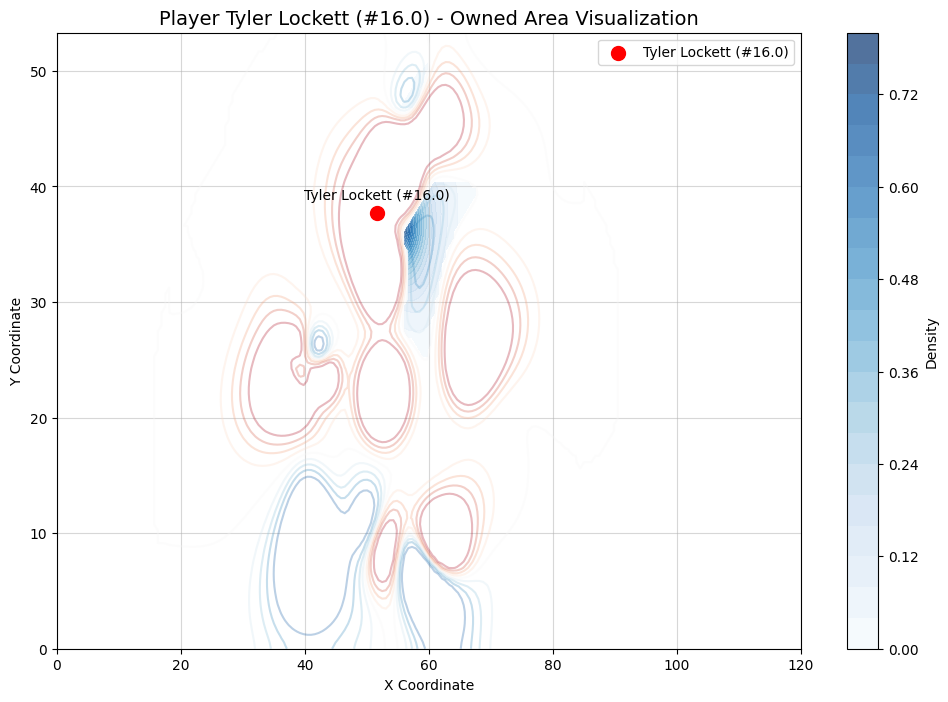

In [ ]:
# Assuming `player_df`, `ownership_grid`, and `pitch_control_grid` have been computed
x_vals = np.linspace(0, 120, 200)
y_vals = np.linspace(0, 53.3, 100)

visualize_player_ownership(
    frame_df=player_df2,          # DataFrame with player information
    player_id= 42412.0,                # Replace with the nflId of the player to visualize
    x_vals=x_vals,               # X grid coordinates
    y_vals=y_vals,               # Y grid coordinates
    ownership_grid=ownership_grid,  # Ownership grid from pitch control
    pitch_control_grid=pitch_control_df  # Pitch control grid
)


In [ ]:

from matplotlib.animation import FuncAnimation
from scipy.ndimage import gaussian_filter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def process_density_column(player_df):
    """
    Ensure the density column in the player_df is properly formatted.
    """
    if 'density' not in player_df.columns:
        raise KeyError("'density' column is missing in player_df.")

    # Convert density values to numpy arrays if they aren't already
    player_df['density'] = player_df['density'].apply(
        lambda d: np.array(d) if isinstance(d, (list, np.ndarray)) else np.zeros((100, 200))
    )
    return player_df

def compute_player_densities_with_pitch_control(df, frame_id):
    """
    Compute Gaussian-Gamma densities for a single frame and calculate pitch control.
    """
    # Generate field grid for density computations
    x_vals = np.linspace(0, 120, 200)
    y_vals = np.linspace(0, 53.3, 100)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Initialize influence arrays
    inf_offense = np.zeros_like(X)
    inf_defense = np.zeros_like(X)
    valid_players = []

    def sigmoid(x, k=1000):
        return 1 / (1 + np.exp(-k * x))

    # Filter DataFrame for the given frame
    frame_df = df[df['frameId'] == frame_id]
    if frame_df.empty:
        raise ValueError(f"No data found for frame {frame_id}.")

    for _, row in frame_df.iterrows():
        if row.displayName == 'football' or pd.isna(row.is_off):
            continue

        # Check if 'density' exists in the row, calculate if missing
        if 'density' not in row or pd.isna(row['density']):
            raise KeyError(f"Missing 'density' column for player {row.displayName} in frame {frame_id}.")

        density = np.array(row['density'])
        density[density < 1e-3] = 0

        if row.is_off:
            inf_offense += density
        else:
            inf_defense += density

        valid_players.append({
            'frameId': frame_id,
            'nflId': row.nflId,
            'displayName': row.displayName,
            'jerseyNumber': row.jerseyNumber,
            'x': row.x,
            'y': row.y,
            'direction': row.direction,
            'speed': row.speed,
            'is_off': row.is_off,
            'density': density
        })

    inf_offense_smooth = gaussian_filter(inf_offense, sigma=2)
    inf_defense_smooth = gaussian_filter(inf_defense, sigma=2)
    pitch_control = sigmoid((inf_defense_smooth - inf_offense_smooth), k=1000)
    pitch_control_masked = np.where((pitch_control >= 0.45) & (pitch_control <= 0.55), np.nan, pitch_control)

    player_df = pd.DataFrame(valid_players)
    offense_influence_df = pd.DataFrame(inf_offense_smooth, index=y_vals, columns=x_vals)
    defense_influence_df = pd.DataFrame(inf_defense_smooth, index=y_vals, columns=x_vals)
    pitch_control_df = pd.DataFrame(pitch_control_masked, index=y_vals, columns=x_vals)

    return player_df, offense_influence_df, defense_influence_df, pitch_control_df

def animate_pitch_control(pitch_control_dfs, player_dfs, frame_ids, output_file=None):
    """
    Animate pitch control over a sequence of frames.
    """
    fig, ax = plt.subplots(figsize=(12, 6))

    def init():
        ax.clear()
        ax.set_xlim(0, 120)
        ax.set_ylim(0, 53.3)
        ax.set_title("Initializing Animation...")
        ax.set_xlabel("X Coordinate")
        ax.set_ylabel("Y Coordinate")
        ax.grid(alpha=0.5)

    def update(frame_id):
        ax.clear()
        pitch_control_df = pitch_control_dfs[frame_id]
        player_df = player_dfs[frame_id]

        required_columns = ['x', 'y', 'jerseyNumber', 'displayName', 'direction', 'speed', 'is_off']
        for col in required_columns:
            if col not in player_df.columns:
                raise KeyError(f"The column '{col}' is missing in the player DataFrame for frame {frame_id}.")

        delta_min = pitch_control_df.values.min()
        delta_max = pitch_control_df.values.max()
        max_abs = max(abs(delta_min), abs(delta_max))

        ax.contourf(
            pitch_control_df.columns,
            pitch_control_df.index,
            pitch_control_df.values,
            cmap='bwr',
            levels=np.linspace(-max_abs, max_abs, 20),
            alpha=0.8
        )

        for _, row in player_df.iterrows():
            color = 'red' if row.is_off else 'blue'
            ax.scatter(row.x, row.y, color=color, edgecolor='black', s=100)
            if pd.notna(row.jerseyNumber):
                ax.text(row.x, row.y + 1, f"{int(row.jerseyNumber)}", ha='center', fontsize=10)
            if pd.notna(row.displayName):
                ax.text(row.x, row.y - 1.5, row.displayName, ha='center', fontsize=8)
            if pd.notna(row.direction) and pd.notna(row.speed):
                theta = np.radians((90 - row.direction) % 360)
                arrow_length = row.speed / 11.3 * 5
                ax.arrow(
                    row.x, row.y,
                    arrow_length * np.cos(theta),
                    arrow_length * np.sin(theta),
                    head_width=1, head_length=2, fc='black', ec='black'
                )

        ax.set_xlim(0, 120)
        ax.set_ylim(0, 53.3)
        ax.set_title(f"Pitch Control (Frame {frame_id})")
        ax.set_xlabel("X Coordinate")
        ax.set_ylabel("Y Coordinate")
        ax.grid(alpha=0.5)

    ani = FuncAnimation(fig, update, frames=frame_ids, init_func=init, interval=200, repeat=False)

    if output_file:
        ani.save(output_file, writer='ffmpeg')

    return ani

min_frame = 100
max_frame = 190
pitch_control_dfs = {}
player_dfs = {}

for frame_id in range(min_frame, max_frame + 1):
    try:
        player_df, _, _, pitch_control_df = compute_player_densities_with_pitch_control(df, frame_id)
        player_df = process_density_column(player_df)

        required_columns = ['frameId', 'density', 'x', 'y', 'direction', 'speed', 'is_off', 'jerseyNumber', 'displayName']
        missing_columns = [col for col in required_columns if col not in player_df.columns]
        if missing_columns:
            raise KeyError(f"Missing columns {missing_columns} in player_df for frame {frame_id}.")

        pitch_control_dfs[frame_id] = pitch_control_df
        player_dfs[frame_id] = player_df[player_df['frameId'] == frame_id]
    except KeyError as e:
        print(f"Error processing frame {frame_id}: {e}")
    except ValueError as e:
        print(f"Skipping frame {frame_id} due to error: {e}")

valid_frame_ids = [frame_id for frame_id in range(min_frame, max_frame + 1) if frame_id in pitch_control_dfs and frame_id in player_dfs]
if not valid_frame_ids:
    raise ValueError("No valid frames with pitch control and player data available for animation.")

ani = animate_pitch_control(pitch_control_dfs, player_dfs, valid_frame_ids, output_file="pitch_control_animation.mp4")

from IPython.display import HTML
HTML(ani.to_jshtml())


Error processing frame 100: "Missing 'density' column for player Kareem Jackson in frame 100."
Error processing frame 101: "Missing 'density' column for player Kareem Jackson in frame 101."
Error processing frame 102: "Missing 'density' column for player Kareem Jackson in frame 102."
Error processing frame 103: "Missing 'density' column for player Kareem Jackson in frame 103."
Error processing frame 104: "Missing 'density' column for player Kareem Jackson in frame 104."
Error processing frame 105: "Missing 'density' column for player Kareem Jackson in frame 105."
Error processing frame 106: "Missing 'density' column for player Kareem Jackson in frame 106."
Error processing frame 107: "Missing 'density' column for player Kareem Jackson in frame 107."
Error processing frame 108: "Missing 'density' column for player Kareem Jackson in frame 108."
Error processing frame 109: "Missing 'density' column for player Kareem Jackson in frame 109."
Error processing frame 110: "Missing 'density' col

ValueError: No valid frames with pitch control and player data available for animation.

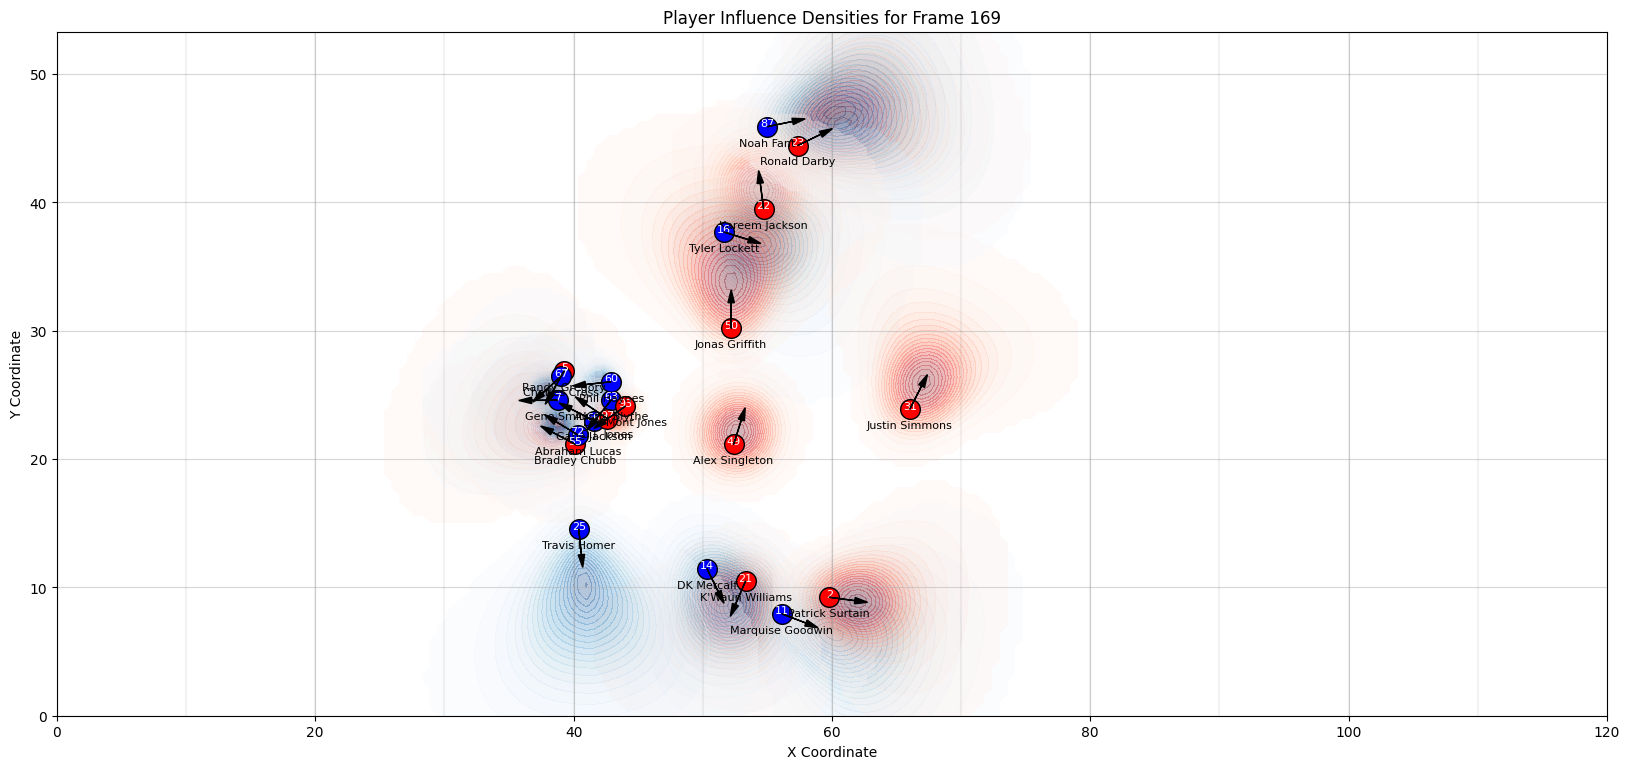

In [ ]:
# Step 2: Plot the densities using the stored density grids
frame_id=169
player_df169, grid169 = compute_player_densities_dataframe(df,min_frame=169, max_frame=169)
plot_player_densities_from_dataframe(player_df169, grid169, frame_id)

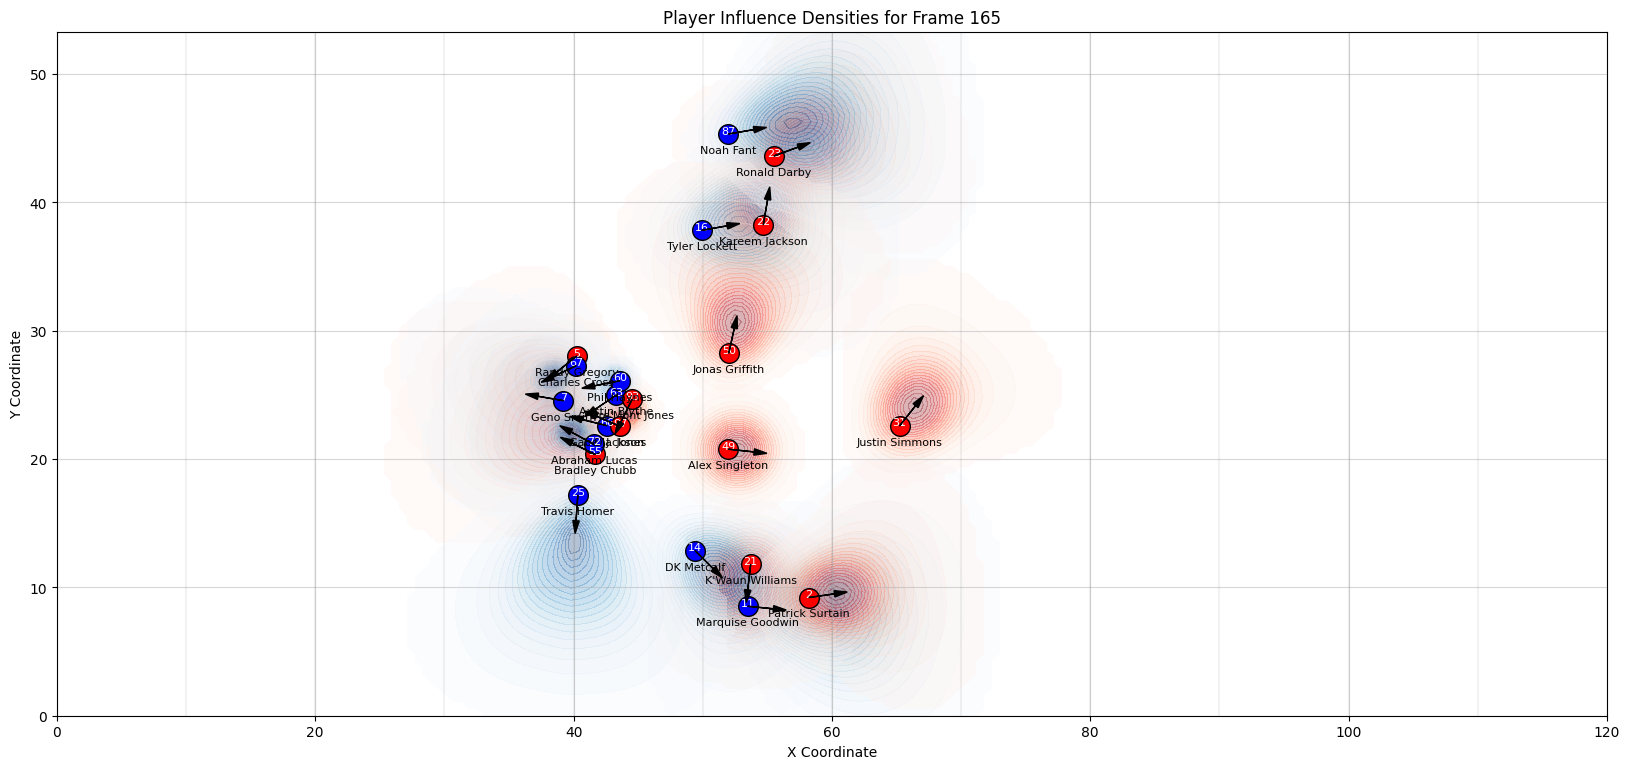

In [ ]:
# Step 2: Plot the densities using the stored density grids
frame_id=165
player_df165, grid165 = compute_player_densities_dataframe(df,min_frame=165, max_frame=165)
plot_player_densities_from_dataframe(player_df165, grid165, frame_id)

In [ ]:
def calculate_and_visualize_player_density_delta(player_df1, player_df2, frame1_id, frame2_id):
    """
    Calculate the delta between player densities for two frames and visualize the result.
    Args:
    - player_df1: DataFrame for frame 1 containing player densities and metadata.
    - player_df2: DataFrame for frame 2 containing player densities and metadata.
    - frame1_id: Frame ID for the first frame.
    - frame2_id: Frame ID for the second frame.
    """
    # Merge the two DataFrames on nflId to align players
    merged_df = pd.merge(
        player_df1[['nflId', 'density']],
        player_df2[['nflId', 'density']],
        on='nflId',
        suffixes=('_frame1', '_frame2')
    )

    # Initialize the delta grid
    x_vals = np.linspace(0, 120, 200)
    y_vals = np.linspace(0, 53.3, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    delta_grid = np.zeros_like(np.array(merged_df.iloc[0]['density_frame1']))

    # Calculate the delta in densities player by player
    for _, row in merged_df.iterrows():
        delta_grid += np.array(row['density_frame2']) - np.array(row['density_frame1'])

    # Visualize the delta grid
    plt.figure(figsize=(12, 6))
    plt.title(f"Pitch Control Density Delta (Frame {frame2_id} - Frame {frame1_id})")
    plt.contourf(
        x_vals,
        y_vals,
        delta_grid,
        cmap='bwr',  # Blue for negative, red for positive
        levels=20,
        alpha=0.8
    )
    plt.colorbar(label="Density Delta")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(alpha=0.5)
    plt.show()

    return merged_df, delta_grid


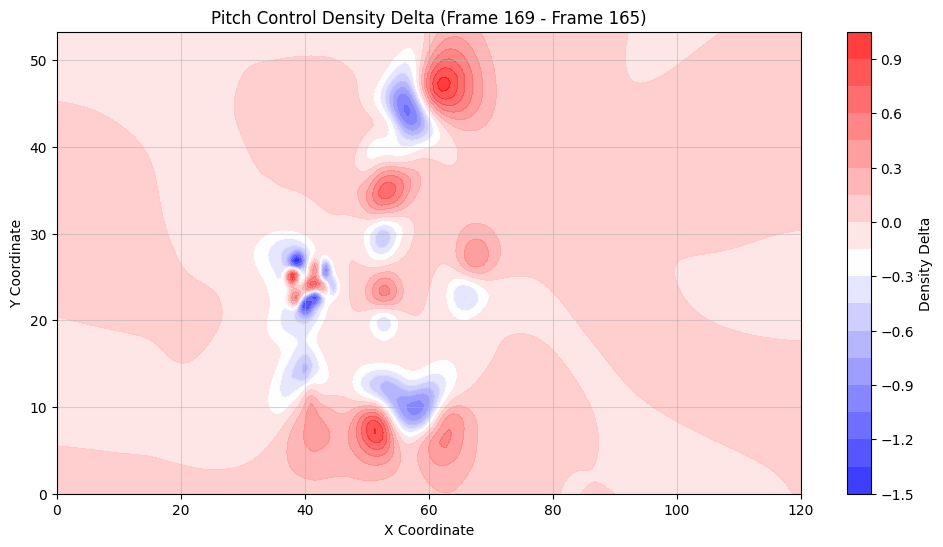

In [ ]:
merged_df, delta_grid = calculate_and_visualize_player_density_delta(
    player_df165, player_df169, frame1_id=165, frame2_id=169
)


In [ ]:
player_df165.dtypes

,0
nflId,float64
frameId,int64
displayName,object
jerseyNumber,float64
x,float64
y,float64
speed,float64
orientation,float64
direction,float64
is_off,float64


In [ ]:
def calculate_and_visualize_single_player_density_delta(player_df1, player_df2, nflId, frame1_id, frame2_id, threshold=0.01):
    """
    Calculate and visualize the density delta for a single player across two frames with filtering.
    Args:
    - player_df1: DataFrame for frame 1 containing player densities and metadata.
    - player_df2: DataFrame for frame 2 containing player densities and metadata.
    - nflId: The ID of the player to analyze.
    - frame1_id: Frame ID for the first frame.
    - frame2_id: Frame ID for the second frame.
    - threshold: Minimum magnitude of delta to visualize.
    """
    # Filter the data for the specific player
    player_data1 = player_df1[player_df1['nflId'] == nflId]
    player_data2 = player_df2[player_df2['nflId'] == nflId]

    if player_data1.empty or player_data2.empty:
        raise ValueError(f"No data found for nflId {nflId} in one of the frames.")

    # Extract densities
    density1 = np.array(player_data1.iloc[0]['density'])
    density2 = np.array(player_data2.iloc[0]['density'])

    # Compute the delta
    density_delta = density2 - density1

    # Apply the threshold to filter out small values
    density_delta[np.abs(density_delta) < threshold] = 0

    # Generate field grid for visualization
    x_vals = np.linspace(0, 120, 200)
    y_vals = np.linspace(0, 53.3, 100)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Determine color scale bounds
    delta_min = density_delta.min()
    delta_max = density_delta.max()
    max_abs = max(abs(delta_min), abs(delta_max))

    # Visualize the delta
    plt.figure(figsize=(12, 6))
    plt.title(f"Density Delta for Player {player_data1.iloc[0]['displayName']} (Frame {frame2_id} - Frame {frame1_id})")
    plt.contourf(
        x_vals,
        y_vals,
        density_delta,
        cmap='bwr',  # Blue for negative, red for positive
        levels=np.linspace(-max_abs, max_abs, 20),
        alpha=0.8
    )
    plt.colorbar(label="Density Delta")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(alpha=0.5)
    plt.show()

    return density_delta


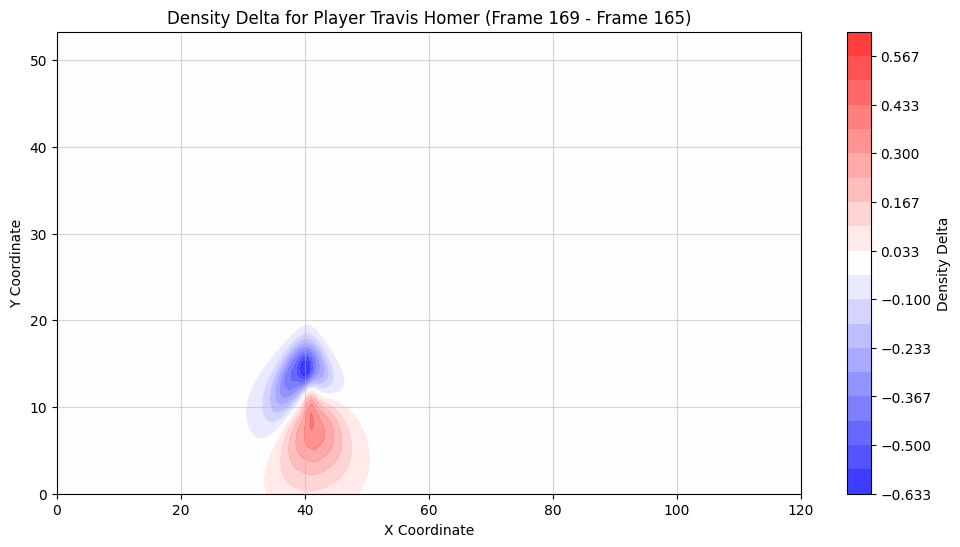

In [ ]:
density_delta = calculate_and_visualize_single_player_density_delta(
    player_df165, player_df169, nflId=47987.0, frame1_id=165, frame2_id=169, threshold=0.01
)

